HW 3: Pipeline Improvement and Empirical Comparisons  
====
By Zhuo Leng
====






improvement:
--------------

1.Preprocess step: fill number of dependence with the median instead of since it is categorical and discrete

2.Feature generation step: include the results of my discretization and binarization into the features of my model

3.Add classifers and evaluation step

step 1: read data
------

In [3]:
#import read.py
import read

In [4]:
df = read.read_data('credit-data.csv')
df.head()

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0         1                 1                              0.766127   45   
1         2                 0                              0.957151   40   
2         3                 0                              0.658180   38   
3         4                 0                              0.233810   30   
4         5                 0                              0.907239   49   

   zipcode  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0    60644                                     2   0.802982         9120.0   
1    60637                                     0   0.121876         2600.0   
2    60601                                     1   0.085113         3042.0   
3    60601                                     0   0.036050         3300.0   
4    60625                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

step 2: explore data
------

In [5]:
#import explore.py
%matplotlib inline 
import explore

In [16]:
df.describe()

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age        zipcode  NumberOfTime30-59DaysPastDueNotWorse  \
count  150000.000000  150000.000000                         150000.000000   
mean       52.295207   60648.810013                              0.421033   
std        14.771866      56.748197                              4.192781   
min         0.000000   60601.000000                              0.000000   
25%        41.000000   60625.000000                              0.000000   
50%        52.000000   60629.000000                              0.000000   
75%        63.000000   60644.000000                              0.000000   
max       109.000000   60804.000000                             98.000000   

           DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count  150000.000000   1.202690e+05                    150000.000000   
mean      353.005076   6.670221e+03                         8.452760   
std      2037.818523   1.438467e+04                         5.145951   
min         0.000000   0.000000e+00                         0.000000   
25%         0.175074   3.400000e+03                         5.000000   
50%         0.366508   5.400000e+03                         8.000000   
75%         0.868254   8.249000e+03                        11.000000   
max    329664.000000   3.008750e+06                        58.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count            150000.000000                 150000.000000   
mean                  0.265973                      1.018240   
std                   4.169304                      1.129771   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  98.000000                     54.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         150000.000000       146076.000000  
mean                               0.240387            0.757222  
std                                4.155179            1.115086  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           20.000000

In [17]:
explore.number_count(df, 'NumberOfDependents')

0.0    86902
1.0    26316
2.0    19522
3.0     9483
4.0     2862
5.0      746
6.0      158
7.0       51
8.0       24
9.0        5
Name: NumberOfDependents, dtype: int64

In [18]:
pd.value_counts(df.NumberOfDependents, ascending=False).head(10).plot(kind = 'bar')

From the top 10 number acount of NumberOfDependents, we could know more than 1/2 of family has 0.0 number of dependents in family excluding themselves(spouse, children etc.). They life on their own.Number of dependents in family excluding themselves (spouse, children etc.)

In [19]:
explore.number_count(df, 'age')

49    3837
48    3806
50    3753
63    3719
47    3719
46    3714
53    3648
51    3627
52    3609
56    3589
Name: age, dtype: int64

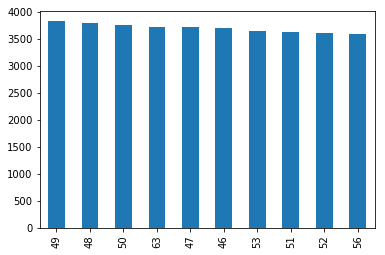

In [20]:
pd.value_counts(df.age, ascending=False).head(10).plot(kind = 'bar')

From the top 10 number acount of age, we could know the age of people don't different a lot. Most people are at the age of 49. 


In [21]:
explore.number_count(df, 'zipcode')

60625    33514
60629    16840
60637    16625
60657    16624
60618    16612
60804    16605
60601    16599
60644    16581
Name: zipcode, dtype: int64

In [22]:
pd.value_counts(df.zipcode, ascending=False).plot(kind = 'bar')

Take a look at zipcode varibale, most people live in zipcode area 60625.

cross tab


In [23]:
explore.crosstable(df, 'NumberOfTimes90DaysLate', 'SeriousDlqin2yrs')

SeriousDlqin2yrs              0     1
NumberOfTimes90DaysLate              
0                        135108  6554
1                          3478  1765
2                           779   776
3                           282   385
4                            96   195
5                            48    83
6                            32    48
7                             7    31
8                             6    15
9                             5    14
10                            3     5
11                            2     3
12                            1     1
13                            2     2
14                            1     1
15                            2     0
17                            0     1
96                            1     4
98                          121   143

In [203]:
pd.crosstab(df.NumberOfTimes90DaysLate, df.SeriousDlqin2yrs).plot(figsize=(10,10))

From the cross table of NumberOfTimes90DaysLate and SeriousDlqin2yrs, most people experienced 90 days past due delinquency or worse have more number of times borrower has been 90 days or more past due. People do not experienced 90 days past due delinquency or worse have less number of times borrower has been 90 days or more past due.

In [25]:
pd.crosstab(df.age, df.NumberOfDependents)


NumberOfDependents  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
age                                                                        
0                      0     0     1     0     0     0     0     0     0   
21                   148     3     1     0     0     0     0     0     0   
22                   385     7     2     2     0     0     0     0     0   
23                   550    33    13     3     0     0     0     0     0   
24                   689    48    19     3     1     0     0     0     0   
25                   774    91    31     7     5     1     0     0     0   
26                   946   128    56    14     4     0     0     0     0   
27                  1001   192    53    32     4     0     0     0     0   
28                  1142   210   114    45     8     1     0     0     0   
29                  1195   254   145    53    14     1     1     0     0   
30                  1337   288   178    72    14     7     1     1     0   
31                  1314   344   245    91    18     4     0     0     0   
32                  1207   380   275   106    53     3     0     0     0   
33                  1254   449   315   140    50    10     2     0     0   
34                  1152   389   360   145    65    11     1     0     0   
35                  1136   418   398   184    58    15     3     1     1   
36                  1139   445   486   202    50    15     5     1     0   
37                  1088   488   541   274    77    18     2     0     0   
38                  1113   484   604   283    84    26     3     0     1   
39                  1202   544   691   383   111    27     4     1     1   
40                  1185   570   758   391   104    43     5     1     1   
41                  1193   517   791   445   113    30     4     0     1   
42                  1159   526   755   427   142    38     7     2     0   
43                  1205   556   789   431   156    33     9     4     1   
44                  1209   574   854   461   133    32     7     2     1   
45                  1363   608   828   457   165    35    11     3     0   
46                  1373   695   876   498   165    35     8     8     2   
47                  1439   672   863   491   148    46     9     0     2   
48                  1509   771   791   459   157    37    11     3     1   
49                  1632   717   790   439   143    46     8     6     1   
..                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
74                  1164   184    23     4     2     0     0     1     1   
75                   981   167    17     3     0     0     0     0     0   
76                   933   165    16     0     0     0     0     0     0   
77                   890   129    11     2     0     0     0     0     0   
78                   837   137    13     2     1     0     0     0     0   
79                   770   131    10     4     0     0     0     0     0   
80                   704   109     7     2     0     0     0     0     0   
81                   629    76     6     1     0     0     0     0     0   
82                   527    69     1     0     1     0     0     0     0   
83                   417    44     2     0     0     0     0     0     0   
84                   406    32     1     0     0     0     0     0     0   
85                   403    30     2     0     0     0     0     0     0   
86                   318    46     2     0     1     0     0     0     0   
87                   279    29     1     1     0     0     0     0     0   
88                   244    20     1     0     0     0     0     0     0   
89                   230    11     1     0     0     0     0     0     0   
90                   148    19     0     0     0     0     0     0     0   
91                   119    10     0     0     0     0     0     0     0   
92                    75     7     0     0     0     0     0     0     0   
93                    67     3     0     0     0

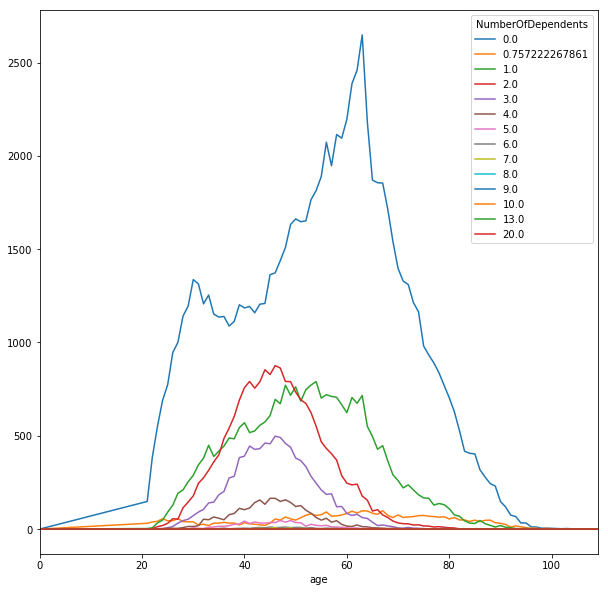

In [202]:
pd.crosstab(df.age, df.NumberOfDependents).plot(figsize=(10,10))

From the cross table of age and NumberOfDependents, most people have 9 number of dependents in family excluding themselves (spouse, children etc.). Also, we could know, with the increase of ages, number of dependents in family excluding themselves (spouse, children etc.) will increase. However, when after age 40-60, number of dependents in family excluding themselves (spouse, children etc.) will decrease.


step 3: pre-processing data: handing missing value
------

In [6]:
#import PreProcess.py
import PreProcess

In [19]:
df_lng = pd.melt(df)
df_lng.head()

variable  value
0  PersonID    1.0
1  PersonID    2.0
2  PersonID    3.0
3  PersonID    4.0
4  PersonID    5.0

In [12]:
PreProcess.print_null_freq(df)

value                                  False  True 
variable                                           
DebtRatio                             150000      0
MonthlyIncome                         120269  29731
NumberOfDependents                    146076   3924
NumberOfOpenCreditLinesAndLoans       150000      0
NumberOfTime30-59DaysPastDueNotWorse  150000      0
NumberOfTime60-89DaysPastDueNotWorse  150000      0
NumberOfTimes90DaysLate               150000      0
NumberRealEstateLoansOrLines          150000      0
PersonID                              150000      0
RevolvingUtilizationOfUnsecuredLines  150000      0
SeriousDlqin2yrs                      150000      0
age                                   150000      0
zipcode                               150000      0

From the crosstable table, we could know that MonthlyIncome and NumberOfDependents are two variables with missing value. We need to fill them with mean value.

In [13]:
df.MonthlyIncome.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [7]:
#fill MonthlyIncome na with mean
PreProcess.fill_na('mean',df,'MonthlyIncome')

0          9120.000000
1          2600.000000
2          3042.000000
3          3300.000000
4         63588.000000
5          3500.000000
6          6670.221237
7          3500.000000
8          6670.221237
9         23684.000000
10         2500.000000
11         6501.000000
12        12454.000000
13        13700.000000
14            0.000000
15        11362.000000
16         6670.221237
17         8800.000000
18         3280.000000
19          333.000000
20        12300.000000
21         3000.000000
22         2500.000000
23         7916.000000
24         2416.000000
25         4676.000000
26         8333.000000
27         2500.000000
28         3400.000000
29         5500.000000
              ...     
149970    15500.000000
149971     5000.000000
149972     6945.000000
149973     5500.000000
149974     5000.000000
149975     6670.221237
149976     6670.221237
149977     6670.221237
149978     2500.000000
149979     8700.000000
149980     5525.000000
149981     6849.000000
149982     

In [22]:
df.NumberOfDependents.describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

*improvement1
----


In [8]:
#fill MonthlyIncome na with median
PreProcess.fill_na('median',df,'NumberOfDependents')

0         2.0
1         1.0
2         0.0
3         0.0
4         0.0
5         1.0
6         0.0
7         0.0
8         0.0
9         2.0
10        0.0
11        2.0
12        2.0
13        2.0
14        0.0
15        2.0
16        0.0
17        0.0
18        2.0
19        0.0
20        0.0
21        2.0
22        0.0
23        0.0
24        0.0
25        1.0
26        0.0
27        1.0
28        0.0
29        0.0
         ... 
149970    2.0
149971    0.0
149972    1.0
149973    1.0
149974    0.0
149975    0.0
149976    0.0
149977    0.0
149978    0.0
149979    0.0
149980    0.0
149981    4.0
149982    3.0
149983    0.0
149984    0.0
149985    0.0
149986    1.0
149987    0.0
149988    0.0
149989    3.0
149990    2.0
149991    0.0
149992    3.0
149993    0.0
149994    0.0
149995    0.0
149996    2.0
149997    0.0
149998    0.0
149999    0.0
Name: NumberOfDependents, dtype: float64

In [9]:
#check again for null value by using cross table
PreProcess.print_null_freq(df)


value                                  False
variable                                    
DebtRatio                             150000
MonthlyIncome                         150000
NumberOfDependents                    150000
NumberOfOpenCreditLinesAndLoans       150000
NumberOfTime30-59DaysPastDueNotWorse  150000
NumberOfTime60-89DaysPastDueNotWorse  150000
NumberOfTimes90DaysLate               150000
NumberRealEstateLoansOrLines          150000
PersonID                              150000
RevolvingUtilizationOfUnsecuredLines  150000
SeriousDlqin2yrs                      150000
age                                   150000
zipcode                               150000

Now all the variables have 150000 number of no-null value. So we successfully fill the missing value with mean of relavent variables. After clean the data, we need to yield a new csv.

In [25]:
df.to_csv("credit-data-post-import.csv", index=False)


step 4: Generate Features/Predictors
----------

In [10]:
#import feature.py
import feature
df.head()

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0         1                 1                              0.766127   45   
1         2                 0                              0.957151   40   
2         3                 0                              0.658180   38   
3         4                 0                              0.233810   30   
4         5                 0                              0.907239   49   

   zipcode  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0    60644                                     2   0.802982         9120.0   
1    60637                                     0   0.121876         2600.0   
2    60601                                     1   0.085113         3042.0   
3    60601                                     0   0.036050         3300.0   
4    60625                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [24]:
#categorical features
#SeriousDlqin2yrs

#df['SeriousDlqin2yrs_False'] = feature.categorical_var(df,'SeriousDlqin2yrs')[0]
#df['SeriousDlqin2yrs_True'] = feature.categorical_var(df,'SeriousDlqin2yrs')[1]
s = feature.categorical_var(df,'SeriousDlqin2yrs')
df = pd.concat([df, s], axis=1)
s

SeriousDlqin2yrs_0  SeriousDlqin2yrs_1
0                        0                   1
1                        1                   0
2                        1                   0
3                        1                   0
4                        1                   0
5                        1                   0
6                        1                   0
7                        1                   0
8                        1                   0
9                        1                   0
10                       1                   0
11                       1                   0
12                       1                   0
13                       0                   1
14                       1                   0
15                       1                   0
16                       1                   0
17                       1                   0
18                       1                   0
19                       1                   0
20                       1                   0
21                       0                   1
22                       1                   0
23                       1                   0
24                       1                   0
25                       0                   1
26                       1                   0
27                       1                   0
28                       1                   0
29                       1                   0
...                    ...                 ...
149970                   1                   0
149971                   1                   0
149972                   1                   0
149973                   1                   0
149974                   1                   0
149975                   1                   0
149976                   1                   0
149977                   1                   0
149978                   1                   0
149979                   0                   1
149980                   1                   0
149981                   1                   0
149982                   1                   0
149983                   1                   0
149984                   1                   0
149985                   1                   0
149986                   1                   0
149987                   1                   0
149988                   1                   0
149989                   1                   0
149990                   1                   0
149991                   1                   0
149992                   1                   0
149993                   1                   0
149994                   1                   0
149995                   1                   0
149996                   1                   0
149997                   1                   0
149998                   1                   0
149999                   1                   0

[150000 rows x 2 columns]

In [78]:
#discretize continuous variables
#RevolvingUtilizationOfUnsecuredLines
max(df['RevolvingUtilizationOfUnsecuredLines']) - min(df['RevolvingUtilizationOfUnsecuredLines'])

50708.0

In [12]:
#because max-min (RevolvingUtilizationOfUnsecuredLines) = 50708, so we choose bin = 100
df['RevolvingUtilizationOfUnsecuredLines_dis'] = feature.discretize_continuous_var(df,'RevolvingUtilizationOfUnsecuredLines', 100)
df['RevolvingUtilizationOfUnsecuredLines_dis']

0         (-50.708, 507.08]
1         (-50.708, 507.08]
2         (-50.708, 507.08]
3         (-50.708, 507.08]
4         (-50.708, 507.08]
5         (-50.708, 507.08]
6         (-50.708, 507.08]
7         (-50.708, 507.08]
8         (-50.708, 507.08]
9         (-50.708, 507.08]
10        (-50.708, 507.08]
11        (-50.708, 507.08]
12        (-50.708, 507.08]
13        (-50.708, 507.08]
14        (-50.708, 507.08]
15        (-50.708, 507.08]
16        (-50.708, 507.08]
17        (-50.708, 507.08]
18        (-50.708, 507.08]
19        (-50.708, 507.08]
20        (-50.708, 507.08]
21        (-50.708, 507.08]
22        (-50.708, 507.08]
23        (-50.708, 507.08]
24        (-50.708, 507.08]
25        (-50.708, 507.08]
26        (-50.708, 507.08]
27        (-50.708, 507.08]
28        (-50.708, 507.08]
29        (-50.708, 507.08]
                ...        
149970    (-50.708, 507.08]
149971    (-50.708, 507.08]
149972    (-50.708, 507.08]
149973    (-50.708, 507.08]
149974    (-50.708, 

In [75]:
#discretize continuous variables
#age
max(df['age']) - min(df['age'])


109

In [22]:
#because age varibale (max-min) =109, we choose bins = 5
df['age_dis'] = feature.discretize_continuous_var(df,'age', 5)
df['age_dis']
#in order to use age as our feature , we still need to transfer it to dummy variables
age = feature.categorical_var(df,'age_dis')
df = pd.concat([df, age], axis=1)
df


PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0              1                 1                              0.766127   45   
1              2                 0                              0.957151   40   
2              3                 0                              0.658180   38   
3              4                 0                              0.233810   30   
4              5                 0                              0.907239   49   
5              6                 0                              0.213179   74   
6              7                 0                              0.305682   57   
7              8                 0                              0.754464   39   
8              9                 0                              0.116951   27   
9             10                 0                              0.189169   57   
10            11                 0                              0.644226   30   
11            12                 0                              0.018798   51   
12            13                 0                              0.010352   46   
13            14                 1                              0.964673   40   
14            15                 0                              0.019657   76   
15            16                 0                              0.548458   64   
16            17                 0                              0.061086   78   
17            18                 0                              0.166284   53   
18            19                 0                              0.221813   43   
19            20                 0                              0.602794   25   
20            21                 0                              0.200923   43   
21            22                 1                              0.025656   38   
22            23                 0                              1.000000   39   
23            24                 0                              0.075427   32   
24            25                 0                              0.046560   58   
25            26                 1                              0.392248   50   
26            27                 0                              0.052436   58   
27            28                 0                              0.034421   69   
28            29                 0                              0.452516   24   
29            30                 0                              0.392995   58   
...          ...               ...                                   ...  ...   
149970    149971                 0                              0.025449   58   
149971    149972                 0                              0.058001   83   
149972    149973                 0                              0.071273   42   
149973    149974                 0                              1.026395   44   
149974    149975                 0                              0.962721   61   
149975    149976                 0                              0.022088   58   
149976    149977                 0                              0.000627   76   
149977    149978                 0                              0.236450   29   
149978    149979                 0                              0.917635   52   
149979    149980                 1                              0.224711   55   
149980    149981                 0                              0.067644   64   
149981    149982                 0                              0.810012   43   
149982    149983                 0                              0.021046   37   
149983    149984                 0                              0.002485   82   
149984    149985                 0                              0.037548   84   
149985    149986                 0                              0.954409   26   
149986    149987                 0                              0.168102   49   
149987    149988                 0     

In [14]:
#categorical features
#zipcode
zip = feature.categorical_var(df,'zipcode')
zip

zipcode_60601  zipcode_60618  zipcode_60625  zipcode_60629  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   1              0              0              0   
3                   1              0              0              0   
4                   0              0              1              0   
5                   0              0              0              1   
6                   0              0              0              0   
7                   0              0              1              0   
8                   0              0              0              0   
9                   0              0              0              1   
10                  0              0              0              0   
11                  0              0              0              0   
12                  0              0              0              0   
13                  0              0              0              0   
14                  0              0              0              0   
15                  0              0              0              1   
16                  1              0              0              0   
17                  0              0              0              0   
18                  1              0              0              0   
19                  0              0              0              0   
20                  0              0              1              0   
21                  0              0              0              1   
22                  1              0              0              0   
23                  0              0              0              1   
24                  0              0              0              0   
25                  0              1              0              0   
26                  1              0              0              0   
27                  0              0              0              0   
28                  0              0              0              0   
29                  0              0              1              0   
...               ...            ...            ...            ...   
149970              0              0              1              0   
149971              0              0              0              0   
149972              0              0              0              0   
149973              0              1              0              0   
149974              0              0              0              0   
149975              0              1              0              0   
149976              0              0              0              0   
149977              1              0              0              0   
149978              0              0              1              0   
149979              0              0              0              0   
149980              0              0              0              0   
149981              1              0              0              0   
149982              0              0              0              0   
149983              0              0              0              1   
149984              0              0              0              1   
149985              0              0              0              0   
149986              0              0              0              0   
149987              0              0              1              0   
149988              0              0              0              0   
149989              0              0              1              0   
149990              0              1              0              0   
149991              1              0              0              0   
149992              0              1              0              0   
149993              0              0              1              0   
149994              0              0              1              0   
149995            

In [15]:
df['zip_60601'] = zip.iloc[:,0]
df['zip_60618'] = zip.iloc[:,1]
df['zip_60625'] = zip.iloc[:,2]
df['zip_60629'] = zip.iloc[:,3]
df['zip_60637'] = zip.iloc[:,4]
df['zip_60644'] = zip.iloc[:,5]
df['zip_60657'] = zip.iloc[:,6]
df['zip_60804'] = zip.iloc[:,7]

In [26]:
#categorical features
#NumberOfTime30-59DaysPastDueNotWorse
import pandas as pd
num = pd.get_dummies(df.iloc[:,5], prefix = 'NumberOfTime30-59DaysPastDueNotWorse')
df = pd.concat([df, num], axis=1)
df

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0              1                 1                              0.766127   45   
1              2                 0                              0.957151   40   
2              3                 0                              0.658180   38   
3              4                 0                              0.233810   30   
4              5                 0                              0.907239   49   
5              6                 0                              0.213179   74   
6              7                 0                              0.305682   57   
7              8                 0                              0.754464   39   
8              9                 0                              0.116951   27   
9             10                 0                              0.189169   57   
10            11                 0                              0.644226   30   
11            12                 0                              0.018798   51   
12            13                 0                              0.010352   46   
13            14                 1                              0.964673   40   
14            15                 0                              0.019657   76   
15            16                 0                              0.548458   64   
16            17                 0                              0.061086   78   
17            18                 0                              0.166284   53   
18            19                 0                              0.221813   43   
19            20                 0                              0.602794   25   
20            21                 0                              0.200923   43   
21            22                 1                              0.025656   38   
22            23                 0                              1.000000   39   
23            24                 0                              0.075427   32   
24            25                 0                              0.046560   58   
25            26                 1                              0.392248   50   
26            27                 0                              0.052436   58   
27            28                 0                              0.034421   69   
28            29                 0                              0.452516   24   
29            30                 0                              0.392995   58   
...          ...               ...                                   ...  ...   
149970    149971                 0                              0.025449   58   
149971    149972                 0                              0.058001   83   
149972    149973                 0                              0.071273   42   
149973    149974                 0                              1.026395   44   
149974    149975                 0                              0.962721   61   
149975    149976                 0                              0.022088   58   
149976    149977                 0                              0.000627   76   
149977    149978                 0                              0.236450   29   
149978    149979                 0                              0.917635   52   
149979    149980                 1                              0.224711   55   
149980    149981                 0                              0.067644   64   
149981    149982                 0                              0.810012   43   
149982    149983                 0                              0.021046   37   
149983    149984                 0                              0.002485   82   
149984    149985                 0                              0.037548   84   
149985    149986                 0                              0.954409   26   
149986    149987                 0                              0.168102   49   
149987    149988                 0     

In [115]:
#discretize continuous variables
#DebtRatio
max(df['DebtRatio']) - min(df['DebtRatio'])

329664.0

In [18]:
#because age varibale (max-min) =329664, we choose bins = 100
df['DebtRatio_dis'] = feature.discretize_continuous_var(df,'age', 100)
df['age_dis']

0         (43.6, 65.4]
1         (21.8, 43.6]
2         (21.8, 43.6]
3         (21.8, 43.6]
4         (43.6, 65.4]
5         (65.4, 87.2]
6         (43.6, 65.4]
7         (21.8, 43.6]
8         (21.8, 43.6]
9         (43.6, 65.4]
10        (21.8, 43.6]
11        (43.6, 65.4]
12        (43.6, 65.4]
13        (21.8, 43.6]
14        (65.4, 87.2]
15        (43.6, 65.4]
16        (65.4, 87.2]
17        (43.6, 65.4]
18        (21.8, 43.6]
19        (21.8, 43.6]
20        (21.8, 43.6]
21        (21.8, 43.6]
22        (21.8, 43.6]
23        (21.8, 43.6]
24        (43.6, 65.4]
25        (43.6, 65.4]
26        (43.6, 65.4]
27        (65.4, 87.2]
28        (21.8, 43.6]
29        (43.6, 65.4]
              ...     
149970    (43.6, 65.4]
149971    (65.4, 87.2]
149972    (21.8, 43.6]
149973    (43.6, 65.4]
149974    (43.6, 65.4]
149975    (43.6, 65.4]
149976    (65.4, 87.2]
149977    (21.8, 43.6]
149978    (43.6, 65.4]
149979    (43.6, 65.4]
149980    (43.6, 65.4]
149981    (21.8, 43.6]
149982    (

In [117]:
#discretize continuous variables
#MonthlyIncome
max(df['MonthlyIncome']) - min(df['MonthlyIncome'])

3008750.0

In [27]:
#because age varibale (max-min) =329664, we choose bins = 1000
df['MonthlyIncome_dis'] = feature.discretize_continuous_var(df,'MonthlyIncome', 1000)
df['MonthlyIncome_dis']

0            (9026.25, 12035]
1         (-3008.75, 3008.75]
2           (3008.75, 6017.5]
3           (3008.75, 6017.5]
4         (63183.75, 66192.5]
5           (3008.75, 6017.5]
6           (6017.5, 9026.25]
7           (3008.75, 6017.5]
8           (6017.5, 9026.25]
9           (21061.25, 24070]
10        (-3008.75, 3008.75]
11          (6017.5, 9026.25]
12          (12035, 15043.75]
13          (12035, 15043.75]
14        (-3008.75, 3008.75]
15           (9026.25, 12035]
16          (6017.5, 9026.25]
17          (6017.5, 9026.25]
18          (3008.75, 6017.5]
19        (-3008.75, 3008.75]
20          (12035, 15043.75]
21        (-3008.75, 3008.75]
22        (-3008.75, 3008.75]
23          (6017.5, 9026.25]
24        (-3008.75, 3008.75]
25          (3008.75, 6017.5]
26          (6017.5, 9026.25]
27        (-3008.75, 3008.75]
28          (3008.75, 6017.5]
29          (3008.75, 6017.5]
                 ...         
149970    (15043.75, 18052.5]
149971      (3008.75, 6017.5]
149972    

In [28]:
#categorical features
#NumberOfDependents
num = feature.categorical_var(df,'NumberOfDependents')
num

NumberOfDependents_0.0  NumberOfDependents_1.0  \
0                            0                       0   
1                            0                       1   
2                            1                       0   
3                            1                       0   
4                            1                       0   
5                            0                       1   
6                            1                       0   
7                            1                       0   
8                            1                       0   
9                            0                       0   
10                           1                       0   
11                           0                       0   
12                           0                       0   
13                           0                       0   
14                           1                       0   
15                           0                       0   
16                           1                       0   
17                           1                       0   
18                           0                       0   
19                           1                       0   
20                           1                       0   
21                           0                       0   
22                           1                       0   
23                           1                       0   
24                           1                       0   
25                           0                       1   
26                           1                       0   
27                           0                       1   
28                           1                       0   
29                           1                       0   
...                        ...                     ...   
149970                       0                       0   
149971                       1                       0   
149972                       0                       1   
149973                       0                       1   
149974                       1                       0   
149975                       1                       0   
149976                       1                       0   
149977                       1                       0   
149978                       1                       0   
149979                       1                       0   
149980                       1                       0   
149981                       0                       0   
149982                       0                       0   
149983                       1                       0   
149984                       1                       0   
149985                       1                       0   
149986                       0                       1   
149987                       1                       0   
149988                       1                       0   
149989                       0                       0   
149990                       0                       0   
149991                       1                       0   
149992                       0                       0   
149993                       1                       0   
149994                       1                       0   
149995                       1                       0   
149996                       0                       0   
149997                       1                       0   
149998                       1                       0   
149999                       1                       0   

        NumberOfDependents_2.0  NumberOfDependents_3.0  \
0                            1                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   
6    

In [29]:
#concat variables to df
df = pd.concat([df, num], axis=1)
df

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0              1                 1                              0.766127   45   
1              2                 0                              0.957151   40   
2              3                 0                              0.658180   38   
3              4                 0                              0.233810   30   
4              5                 0                              0.907239   49   
5              6                 0                              0.213179   74   
6              7                 0                              0.305682   57   
7              8                 0                              0.754464   39   
8              9                 0                              0.116951   27   
9             10                 0                              0.189169   57   
10            11                 0                              0.644226   30   
11            12                 0                              0.018798   51   
12            13                 0                              0.010352   46   
13            14                 1                              0.964673   40   
14            15                 0                              0.019657   76   
15            16                 0                              0.548458   64   
16            17                 0                              0.061086   78   
17            18                 0                              0.166284   53   
18            19                 0                              0.221813   43   
19            20                 0                              0.602794   25   
20            21                 0                              0.200923   43   
21            22                 1                              0.025656   38   
22            23                 0                              1.000000   39   
23            24                 0                              0.075427   32   
24            25                 0                              0.046560   58   
25            26                 1                              0.392248   50   
26            27                 0                              0.052436   58   
27            28                 0                              0.034421   69   
28            29                 0                              0.452516   24   
29            30                 0                              0.392995   58   
...          ...               ...                                   ...  ...   
149970    149971                 0                              0.025449   58   
149971    149972                 0                              0.058001   83   
149972    149973                 0                              0.071273   42   
149973    149974                 0                              1.026395   44   
149974    149975                 0                              0.962721   61   
149975    149976                 0                              0.022088   58   
149976    149977                 0                              0.000627   76   
149977    149978                 0                              0.236450   29   
149978    149979                 0                              0.917635   52   
149979    149980                 1                              0.224711   55   
149980    149981                 0                              0.067644   64   
149981    149982                 0                              0.810012   43   
149982    149983                 0                              0.021046   37   
149983    149984                 0                              0.002485   82   
149984    149985                 0                              0.037548   84   
149985    149986                 0                              0.954409   26   
149986    149987                 0                              0.168102   49   
149987    149988                 0     

step 5: build classifier and evaluation
-------

The classifier I will use is Logistic Regression, K-Nearest Neighbor, Decision Trees, Random Forests, Boosting, and Bagging.

In [30]:
#import Classifer/Evaluation.py
import ClassifierEvaluation6
import pandas as pd

/Users/zhuoleng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/zhuoleng/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [31]:
NOTEBOOK = 1

In [32]:
df.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'RevolvingUtilizationOfUnsecuredLines_dis', 'age_dis', 'zip_60601',
       'zip_60618', 'zip_60625', 'zip_60629', 'zip_60637', 'zip_60644',
       'zip_60657', 'zip_60804', 'DebtRatio_dis', 'MonthlyIncome_dis',
       'NumberOfDependents_0.0', 'NumberOfDependents_1.0',
       'NumberOfDependents_2.0', 'NumberOfDependents_3.0',
       'NumberOfDependents_4.0', 'NumberOfDependents_5.0',
       'NumberOfDependents_6.0', 'NumberOfDependents_7.0',
       'NumberOfDependents_8.0', 'NumberOfDependents_9.0',
       'NumberOfDependents_10.0', 'NumberOfDependents_13.0',
       'NumberOfDependents_20.0', 'age_dis_(-0.109, 21.8]',
       'age_dis

improvement2: include the results of my discretization and binarization into the features of my model
---


I choose to use 'RevolvingUtilizationOfUnsecuredLines', numberofdependents, 'age', 'NumberOfTimes90DaysLate' as my features.

In [38]:
features  =  ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents_0.0', 'NumberOfDependents_1.0',
       'NumberOfDependents_2.0', 'NumberOfDependents_3.0',
       'NumberOfDependents_4.0', 'NumberOfDependents_5.0',
       'NumberOfDependents_6.0', 'NumberOfDependents_7.0',
       'NumberOfDependents_8.0', 'NumberOfDependents_9.0',
       'NumberOfDependents_10.0', 'NumberOfDependents_13.0',
       'NumberOfDependents_20.0','age_dis_(-0.109, 21.8]',
       'age_dis_(21.8, 43.6]', 'age_dis_(43.6, 65.4]', 'age_dis_(65.4, 87.2]',
       'age_dis_(87.2, 109]', 'NumberOfTimes90DaysLate']

RF


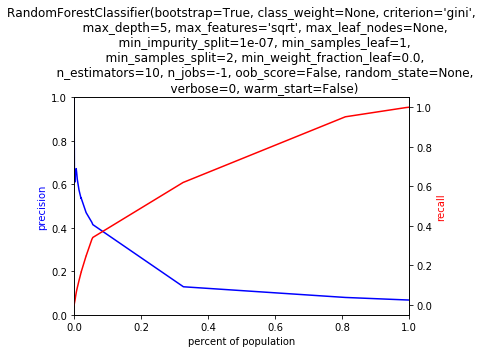

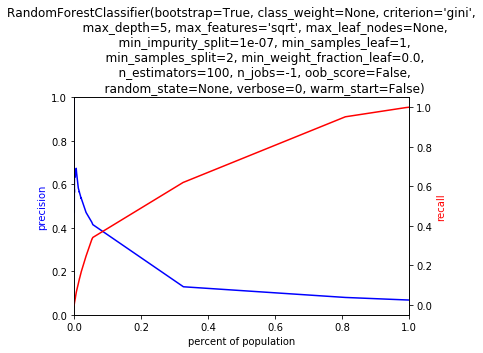

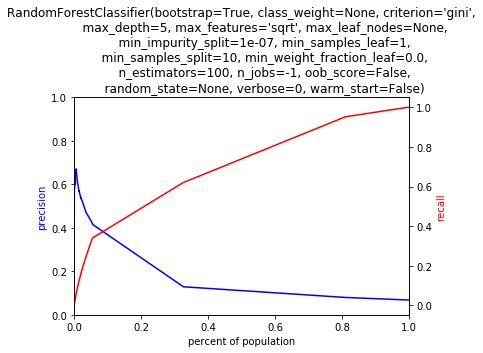

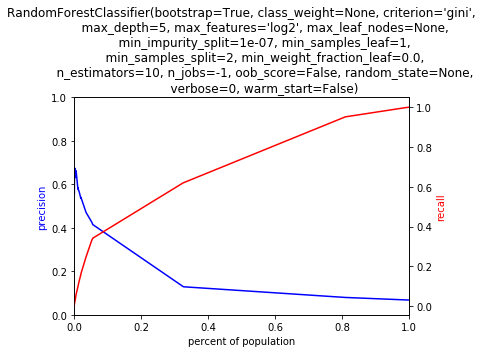

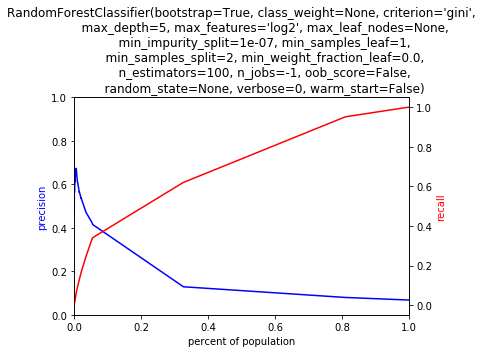

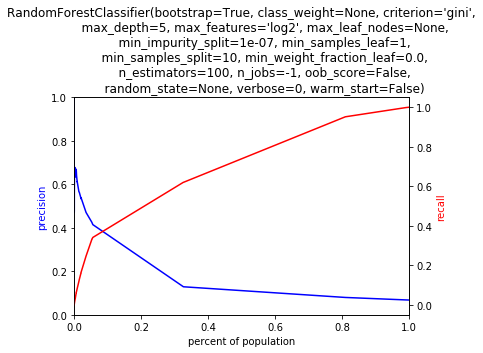

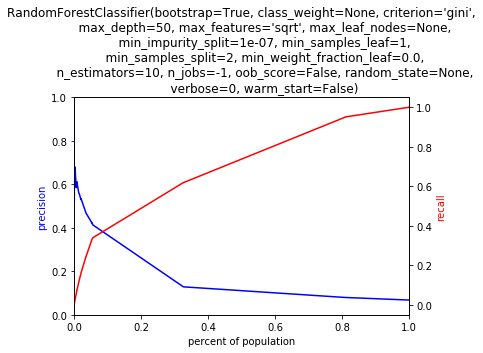

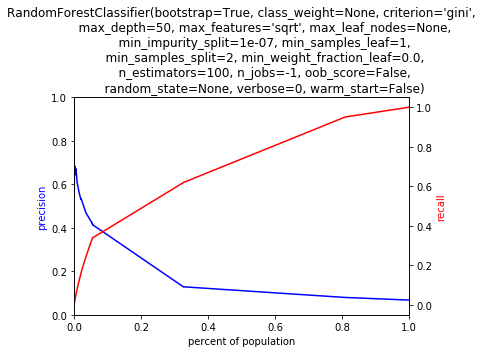

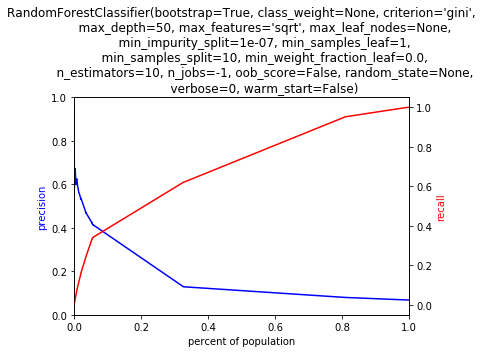

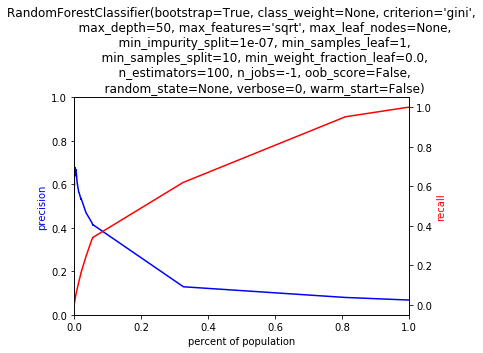

DT


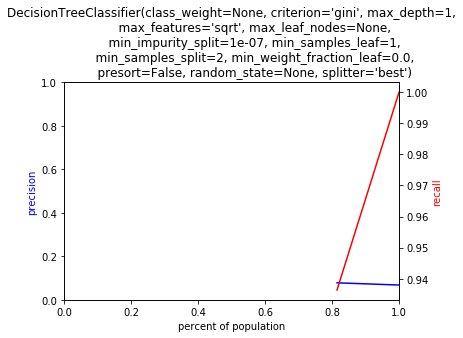

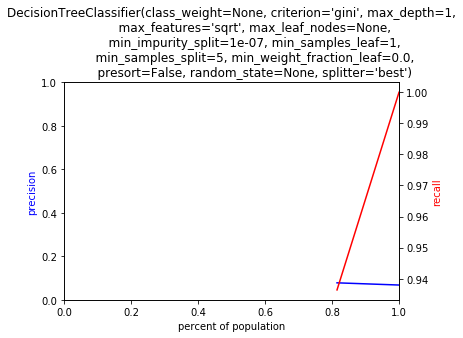

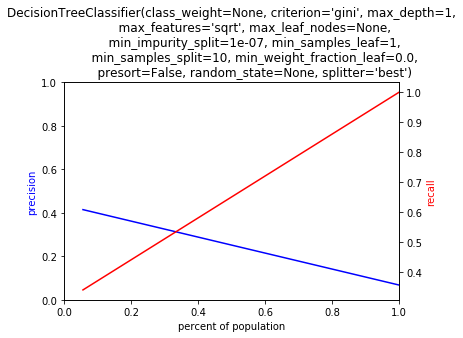

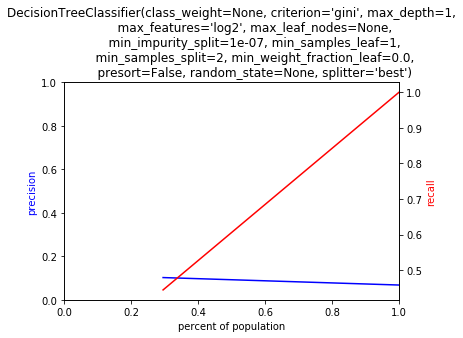

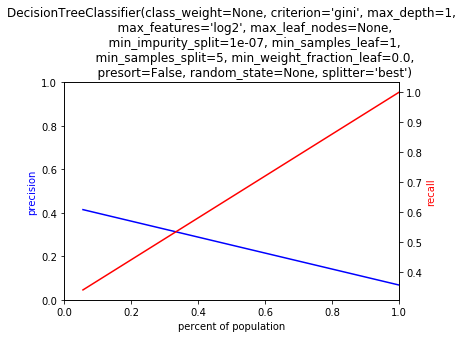

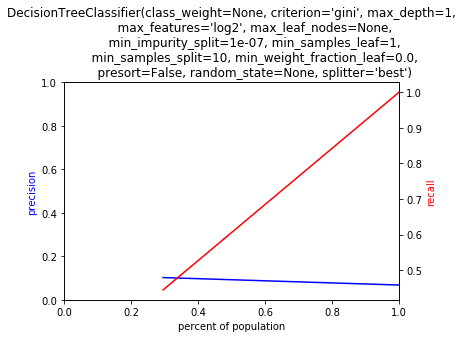

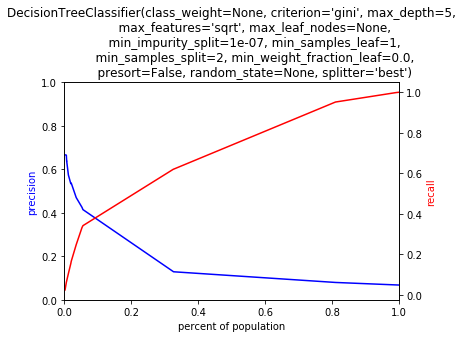

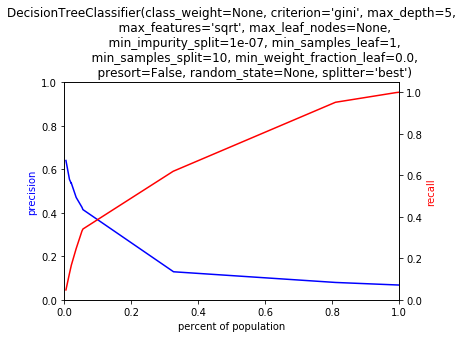

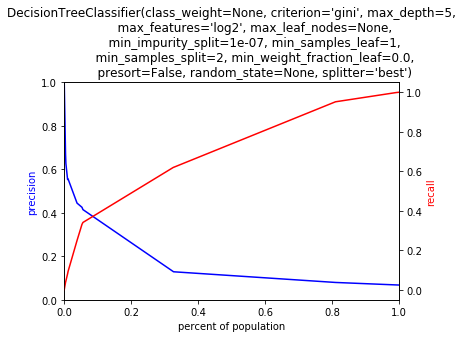

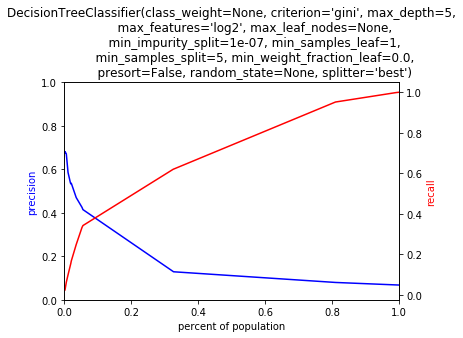

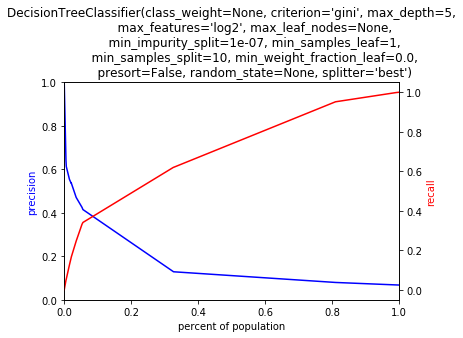

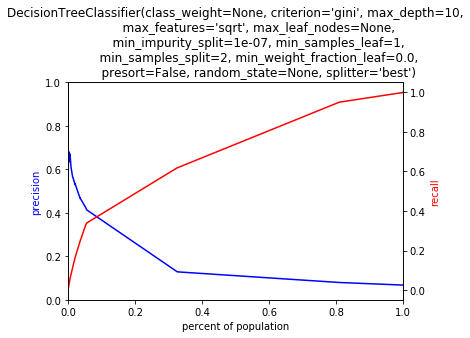

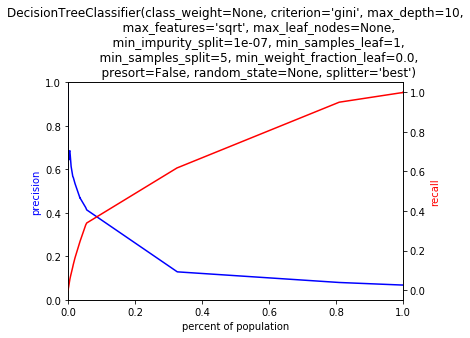

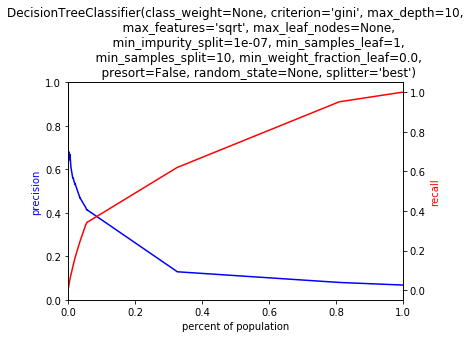

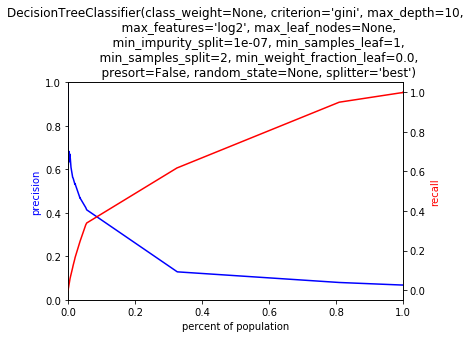

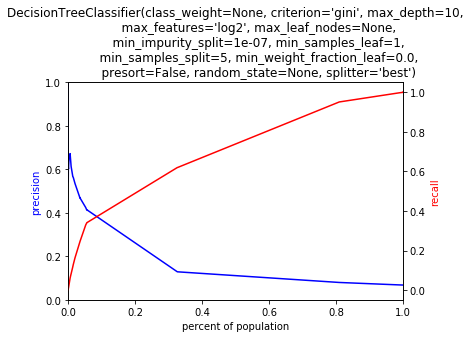

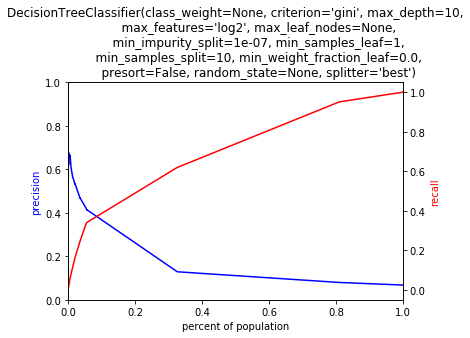

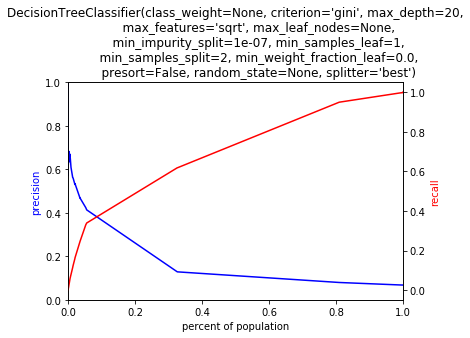

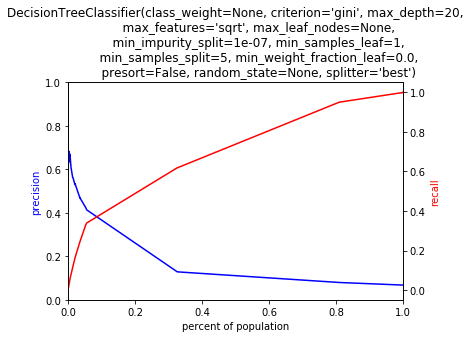

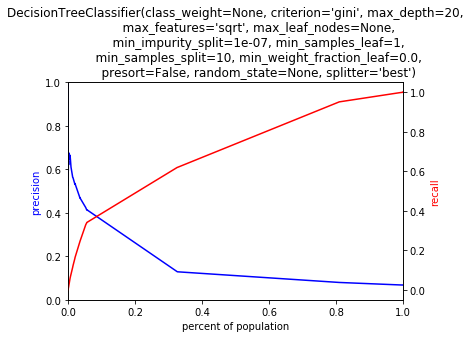

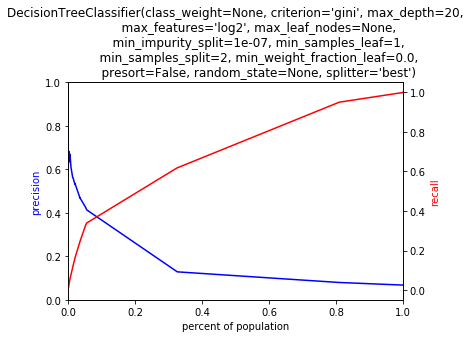

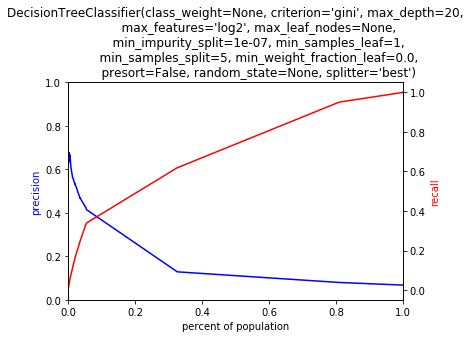

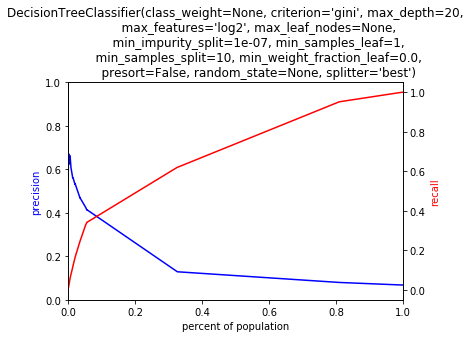

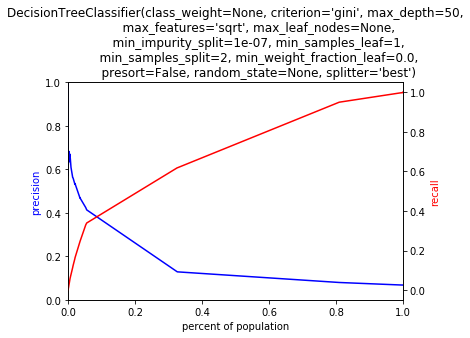

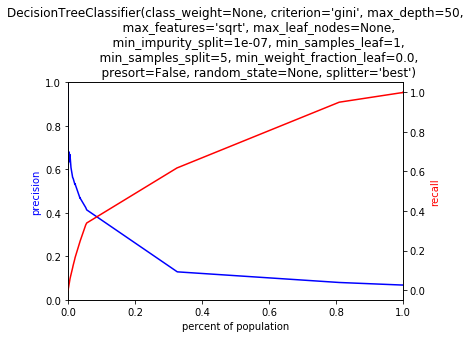

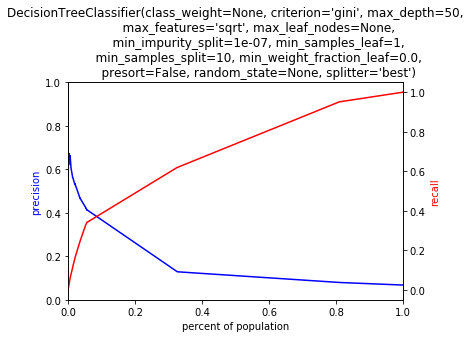

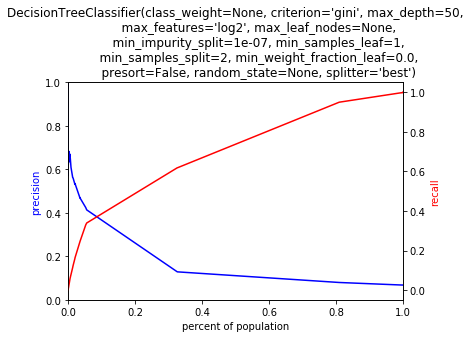

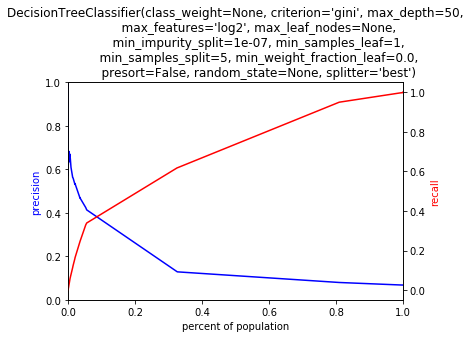

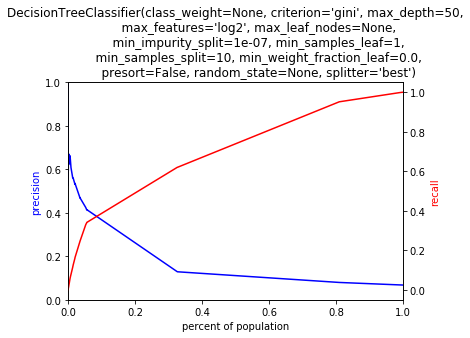

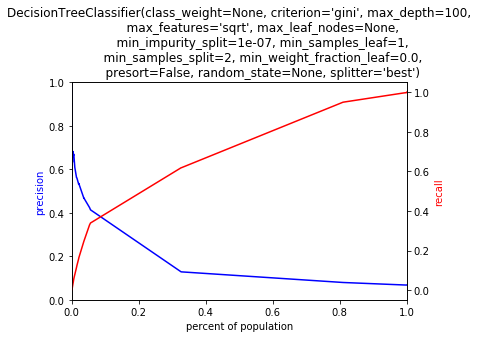

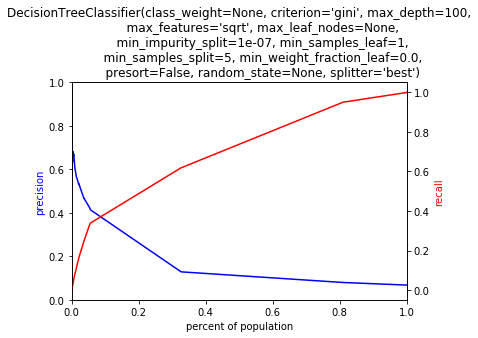

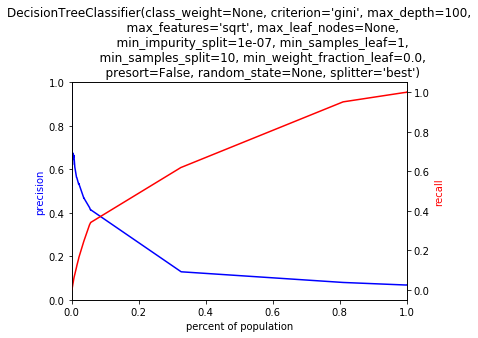

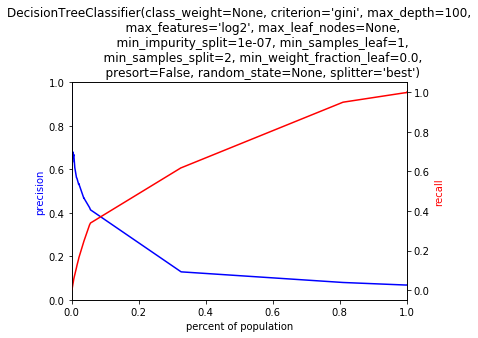

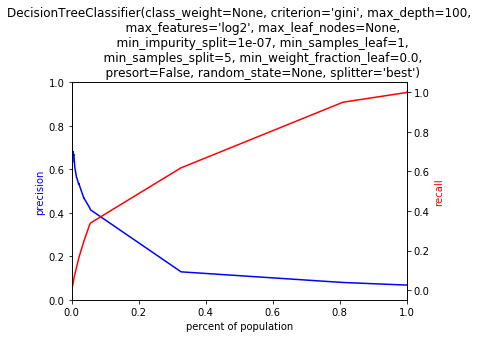

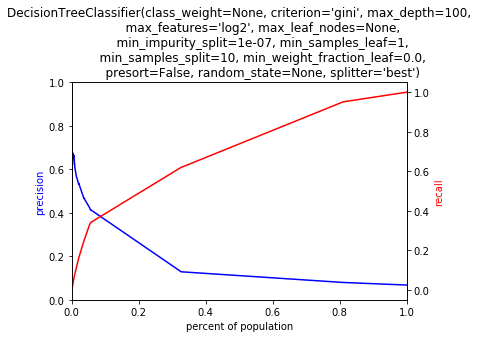

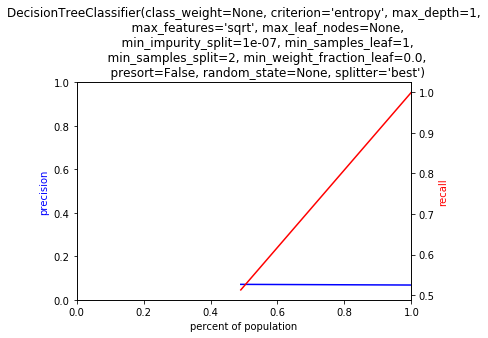

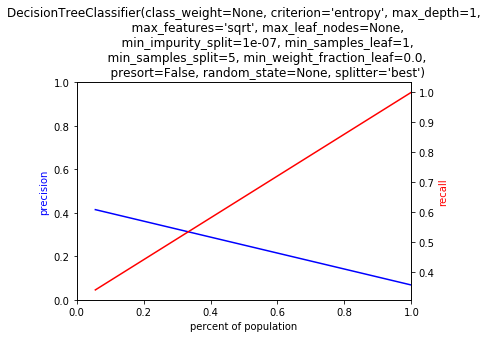

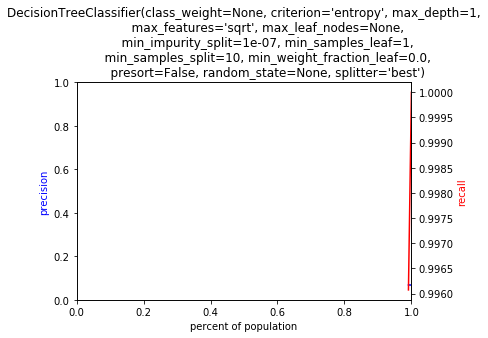

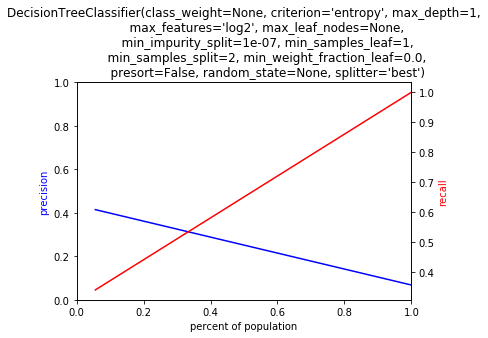

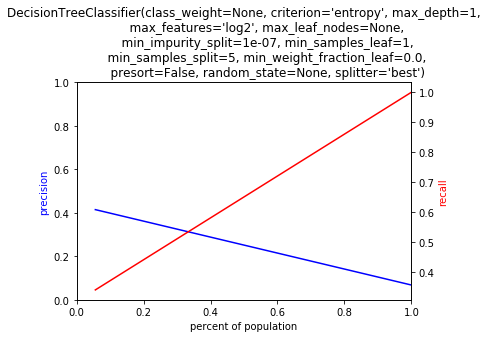

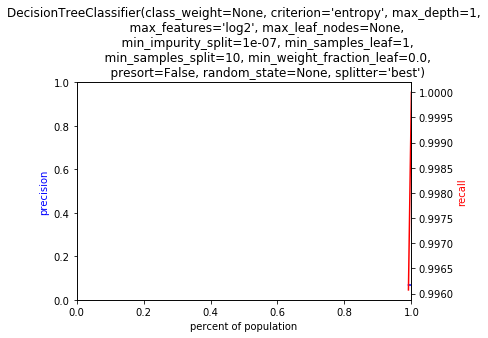

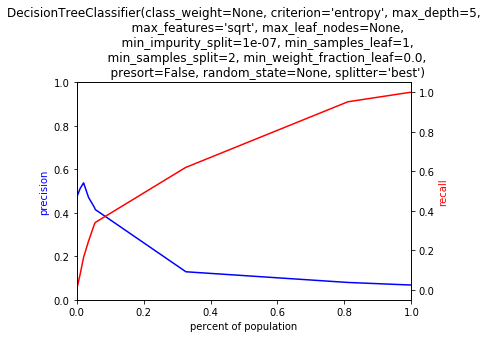

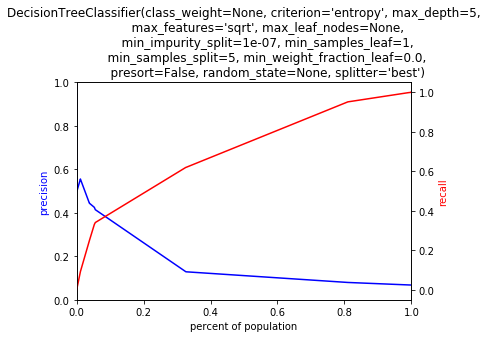

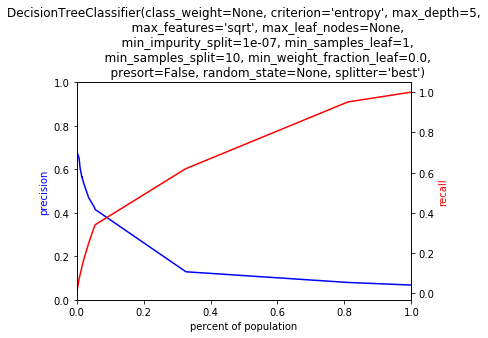

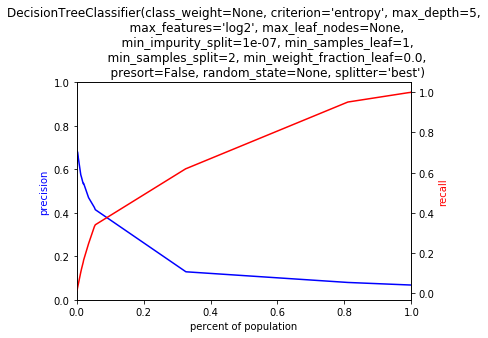

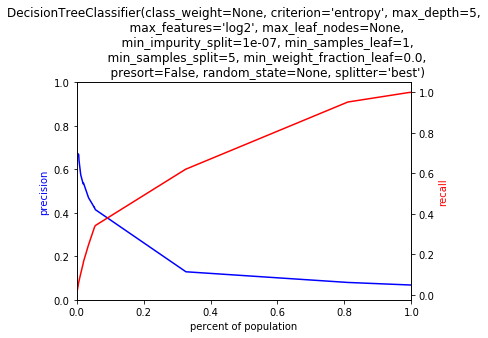

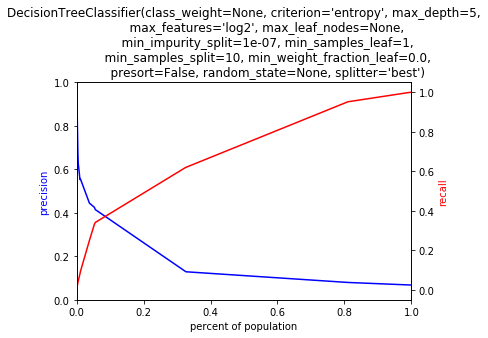

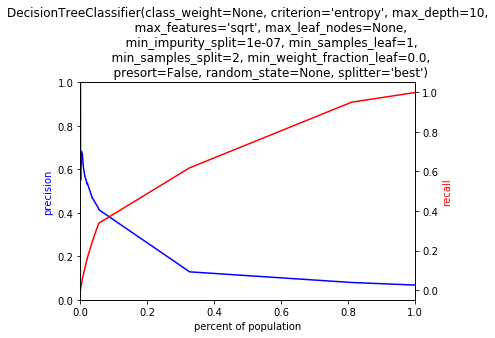

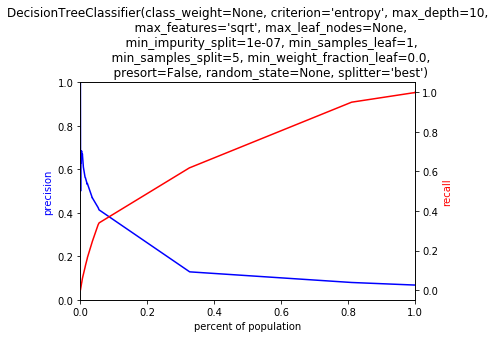

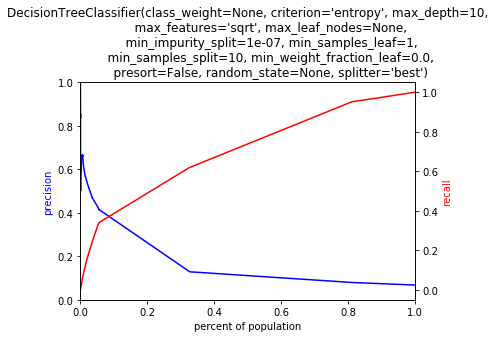

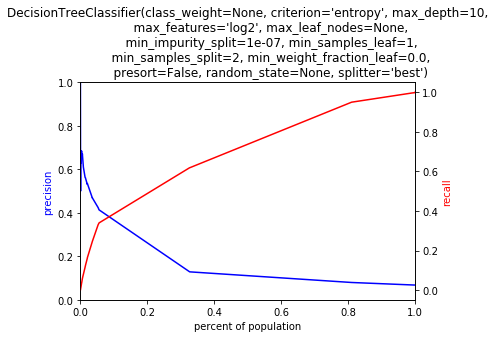

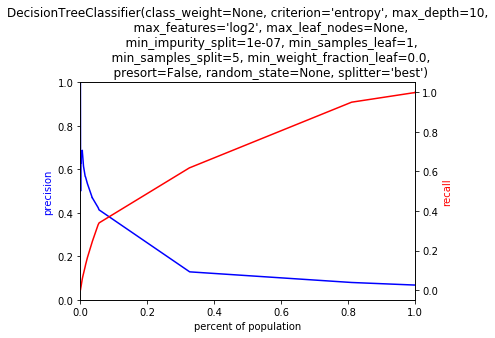

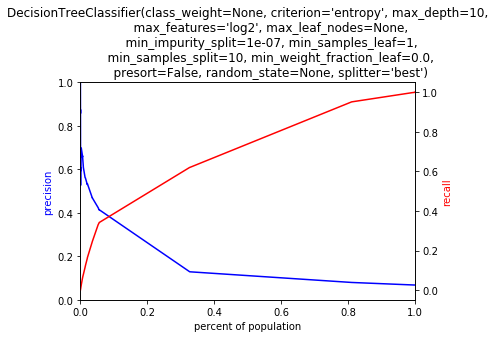

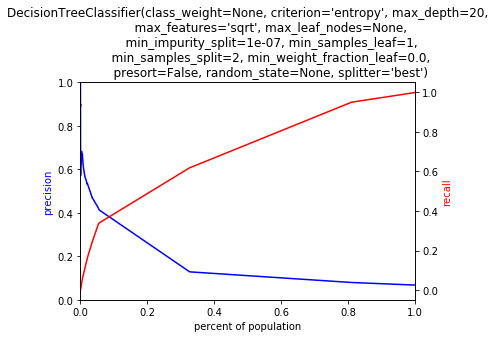

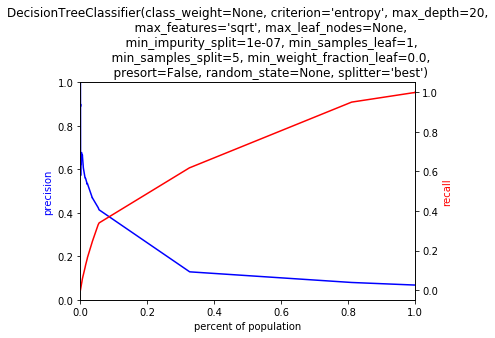

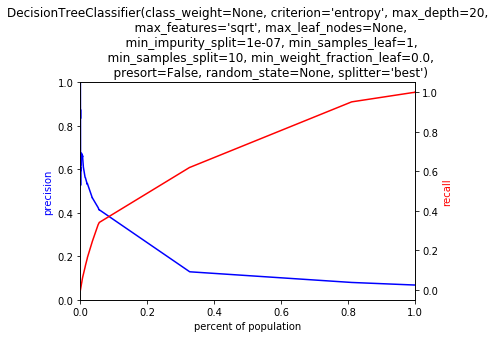

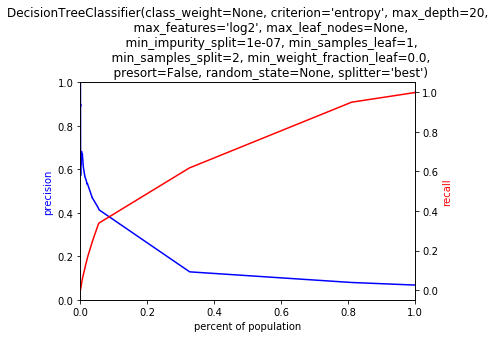

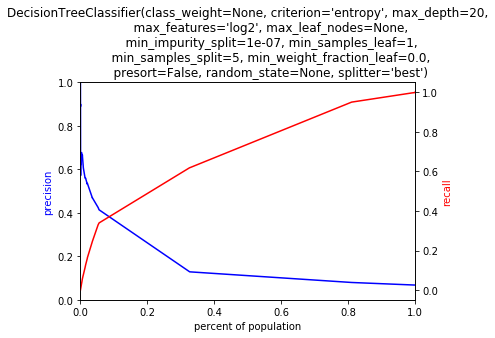

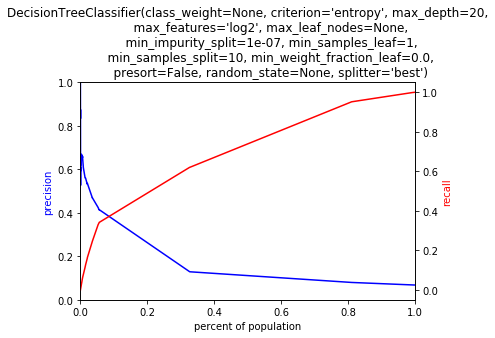

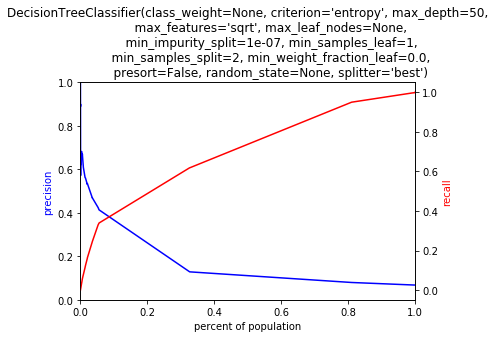

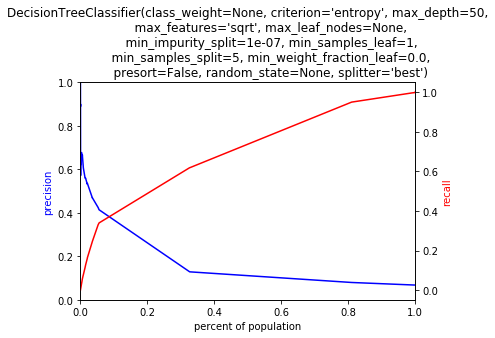

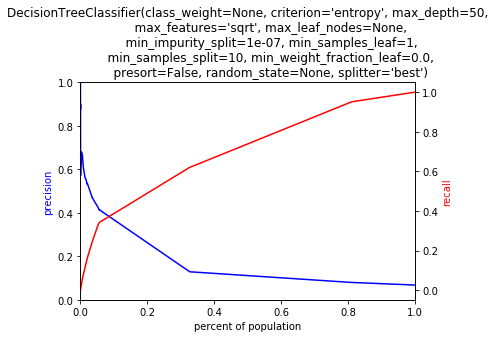

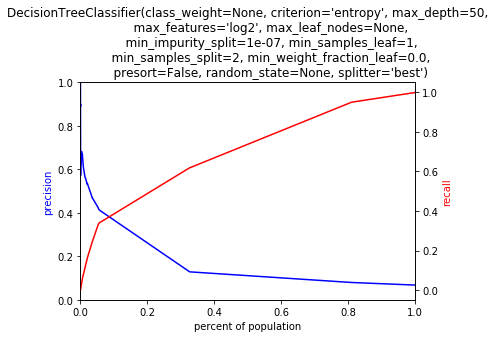

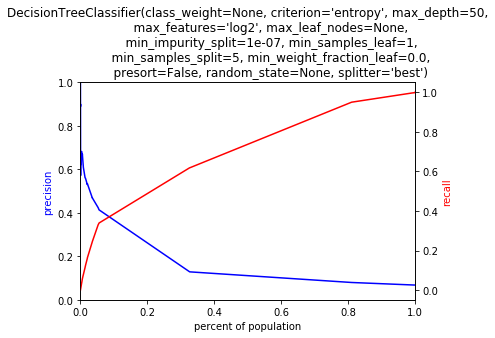

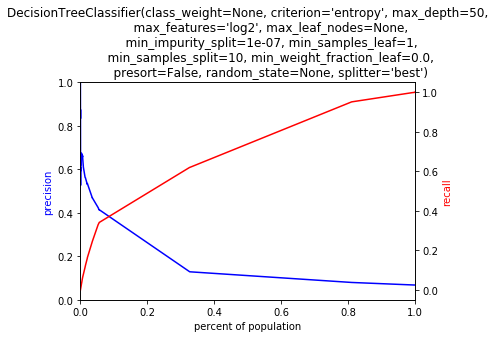

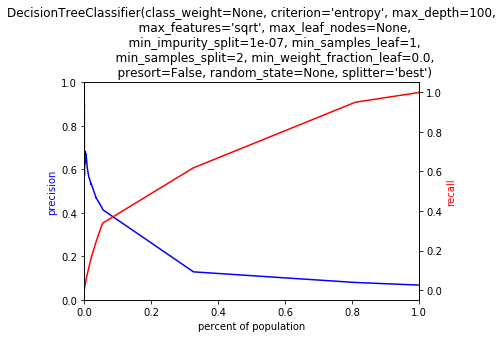

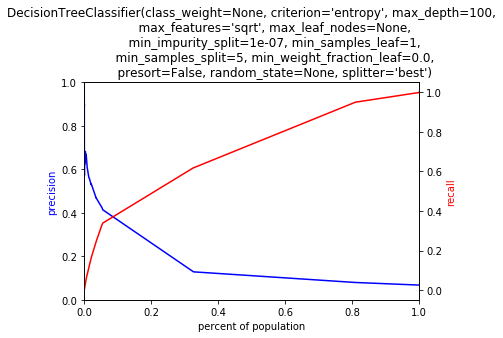

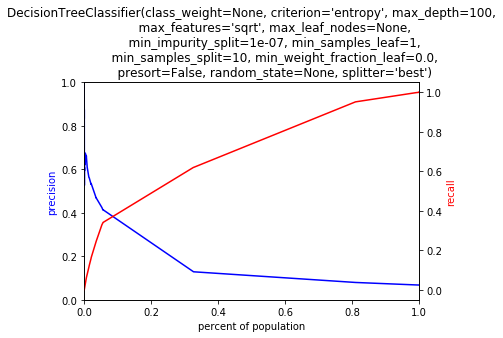

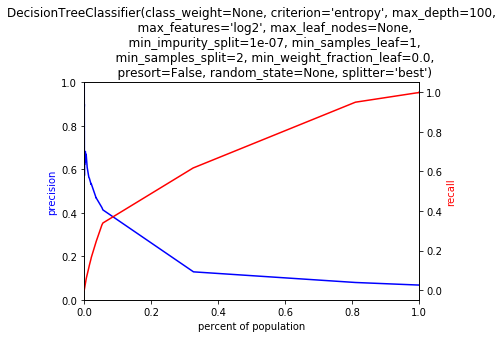

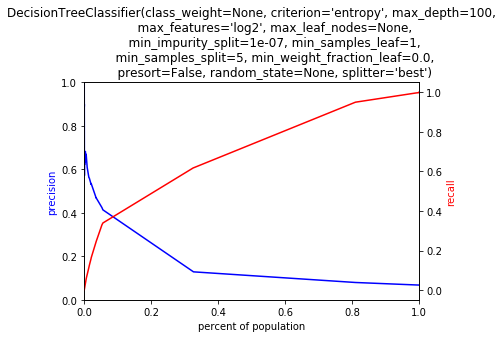

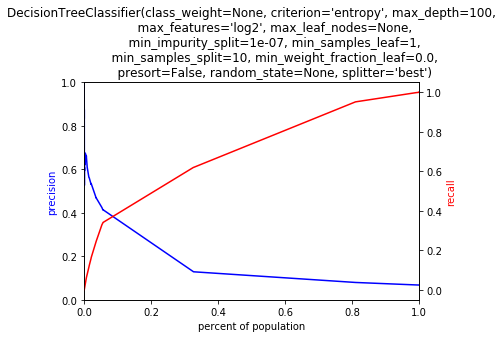

KNN


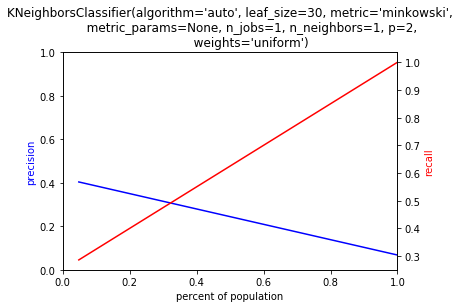

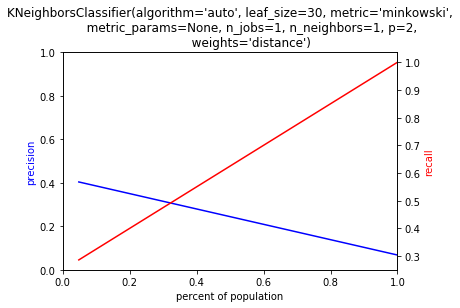

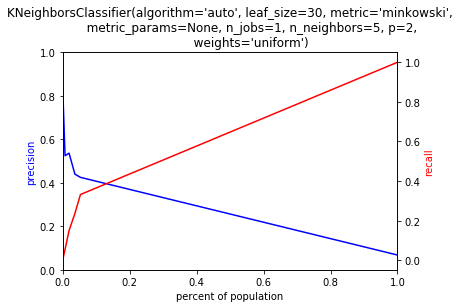

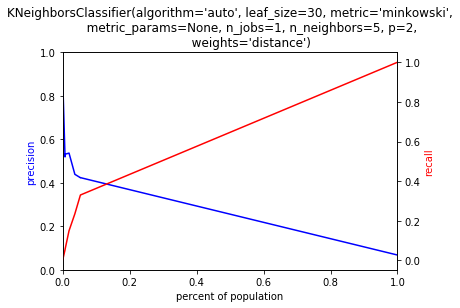

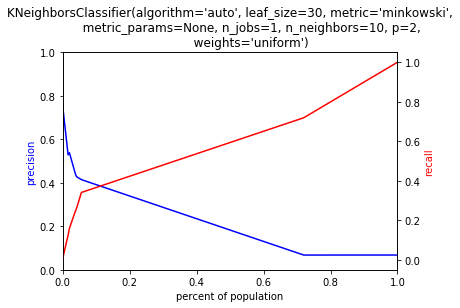

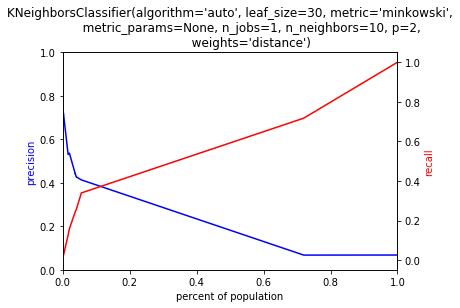

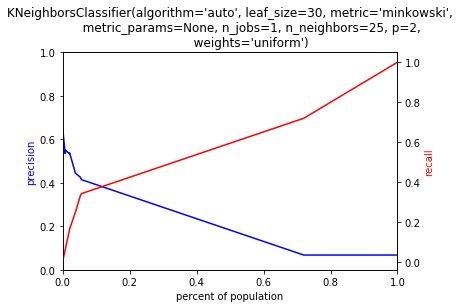

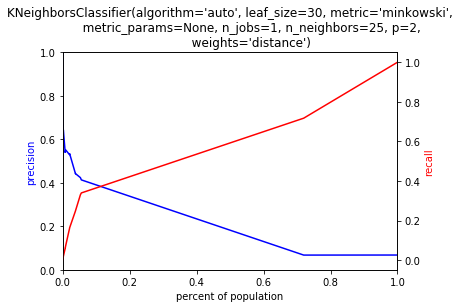

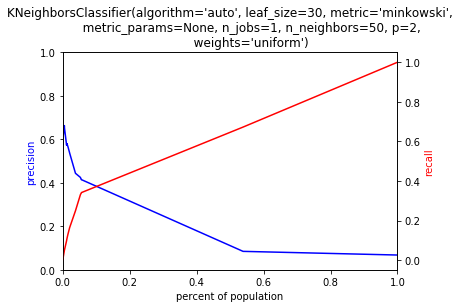

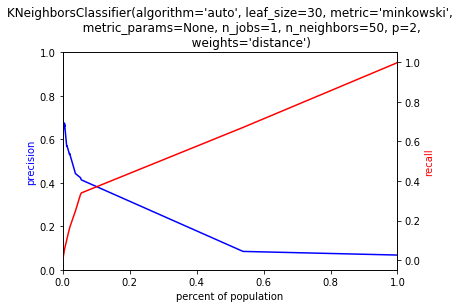

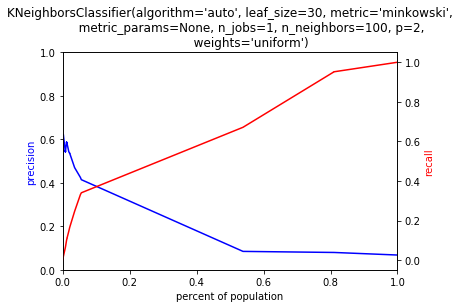

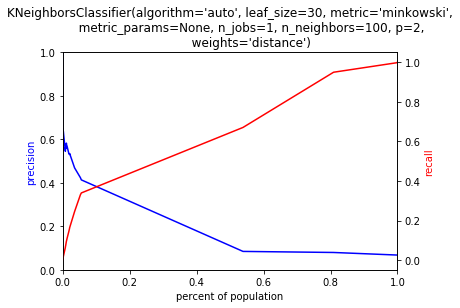

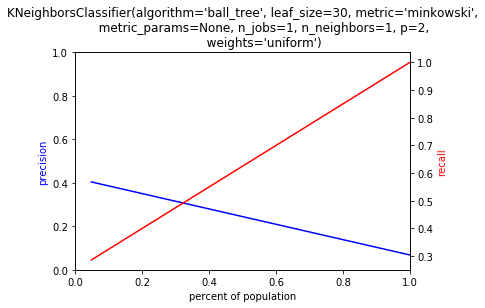

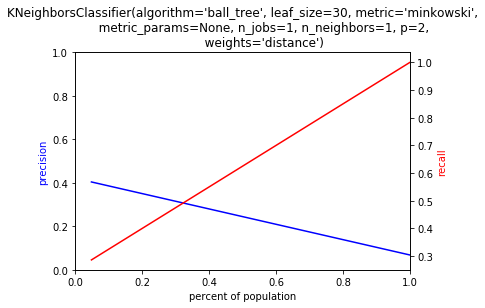

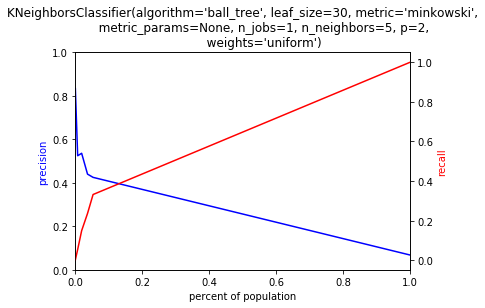

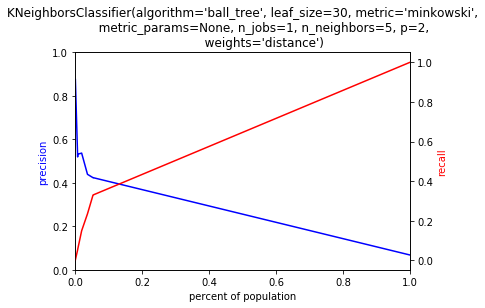

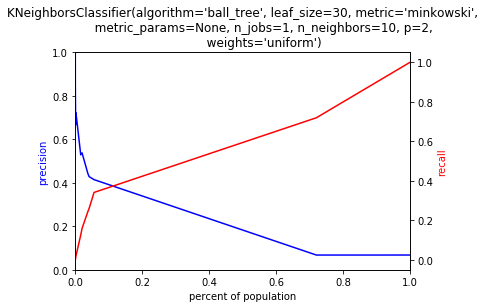

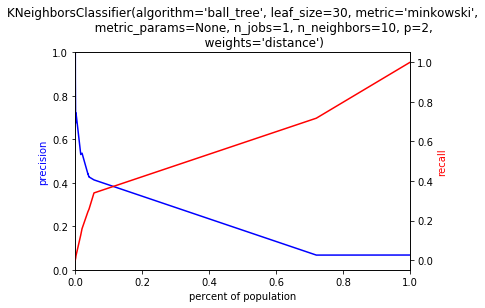

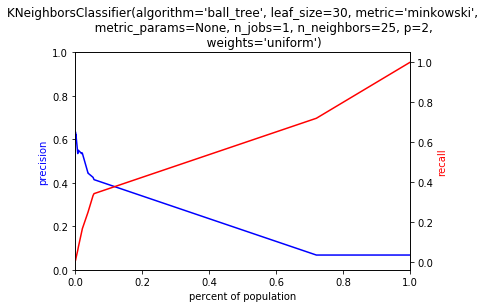

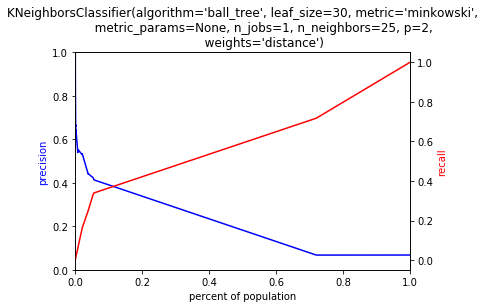

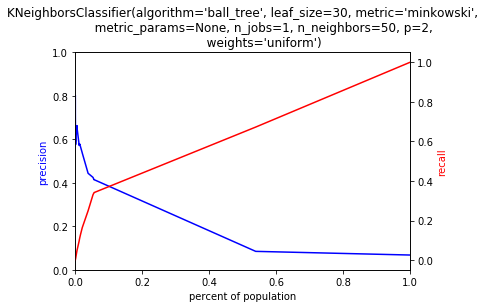

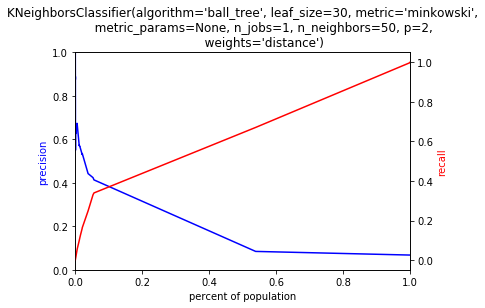

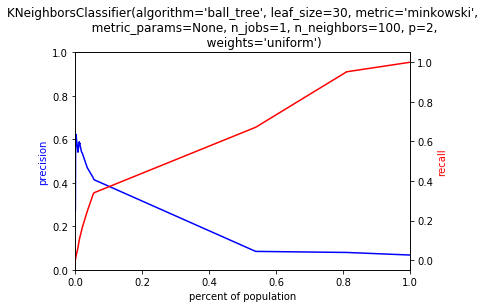

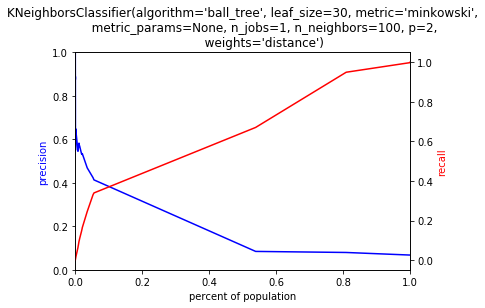

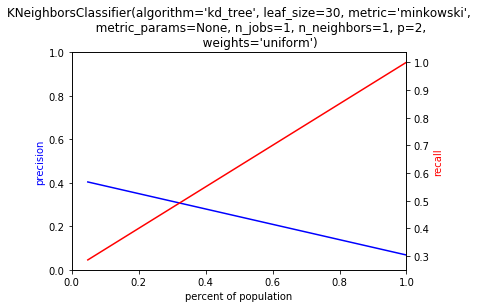

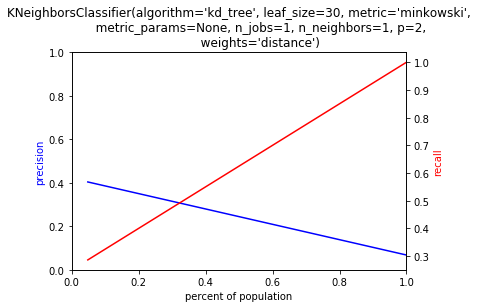

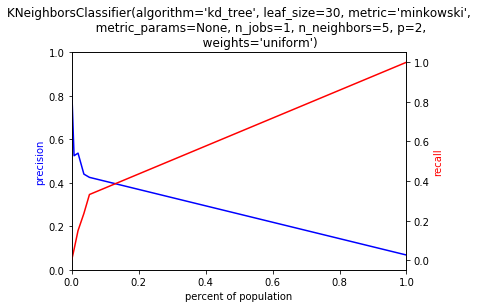

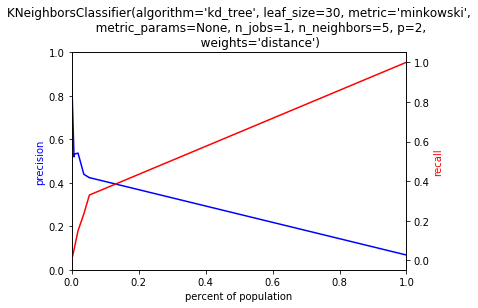

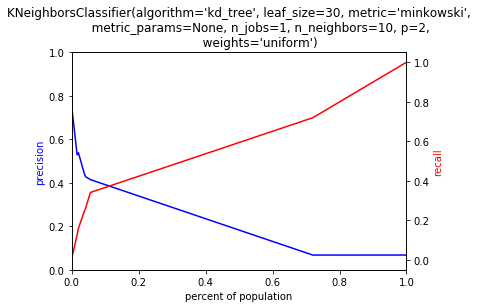

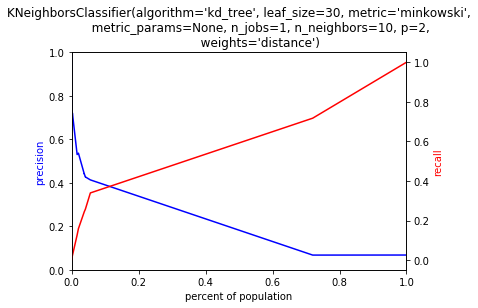

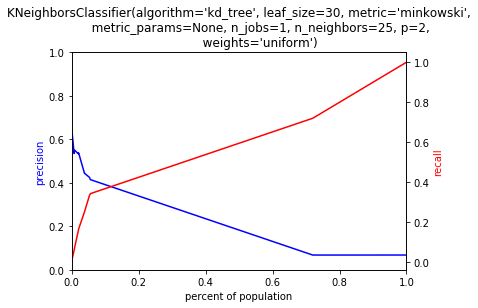

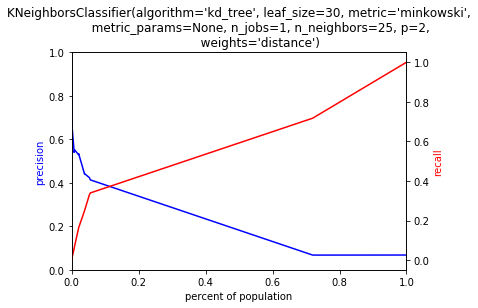

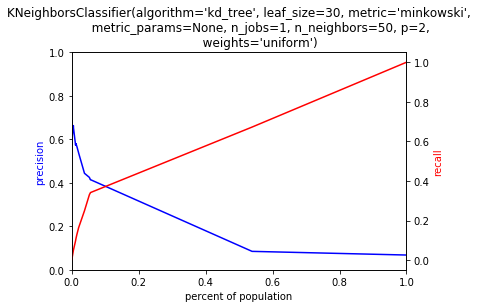

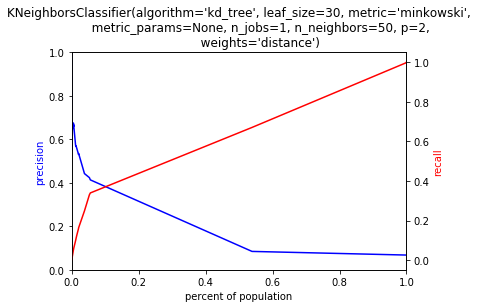

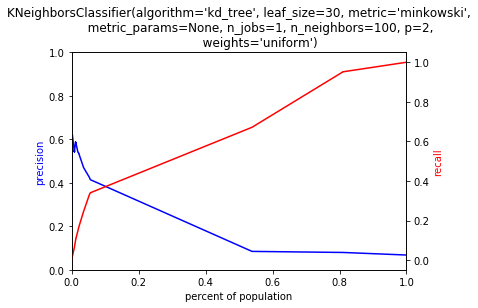

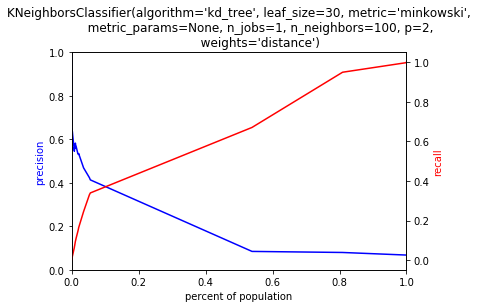

ET


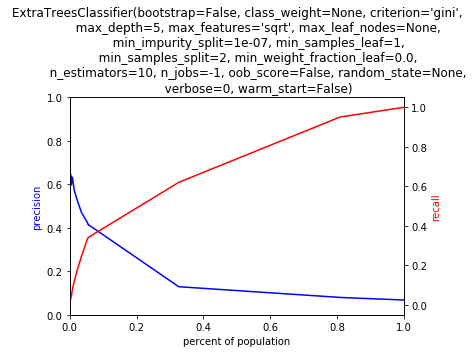

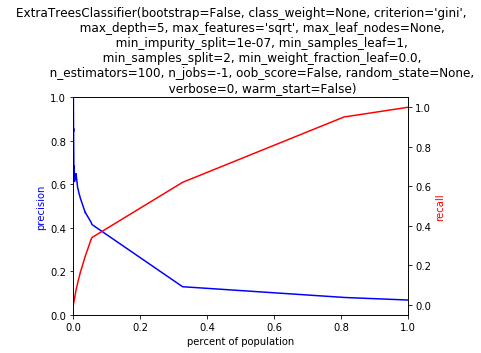

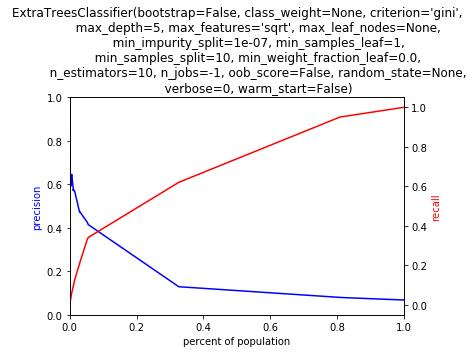

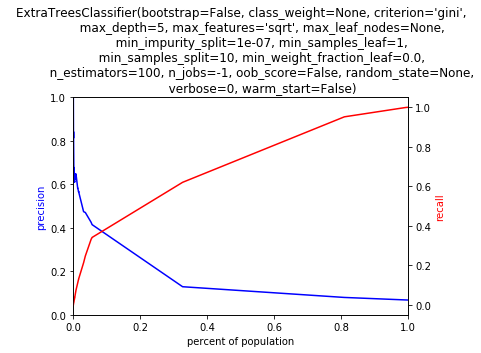

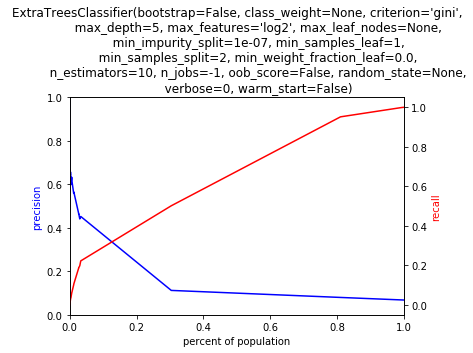

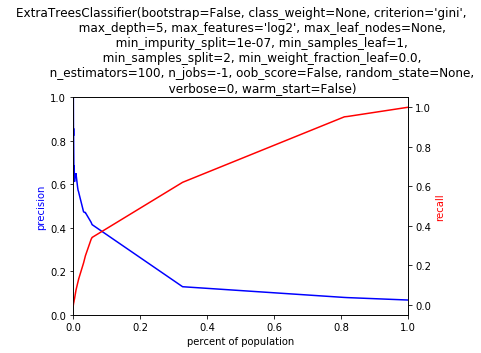

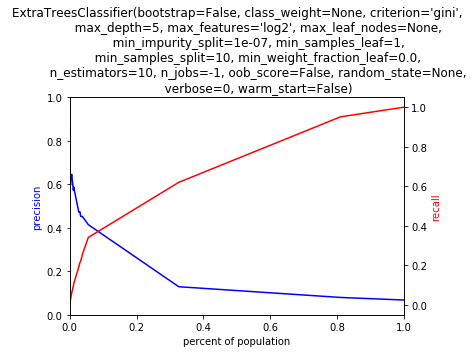

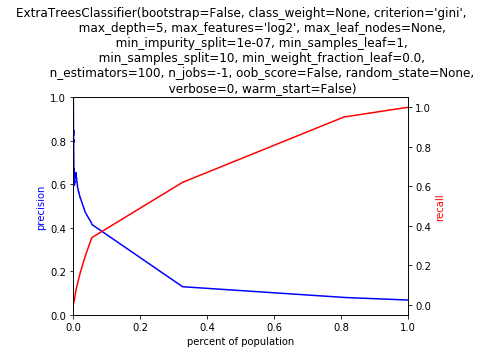

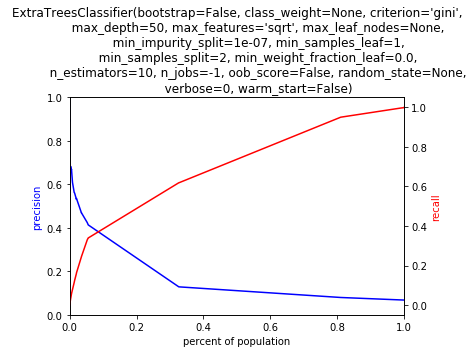

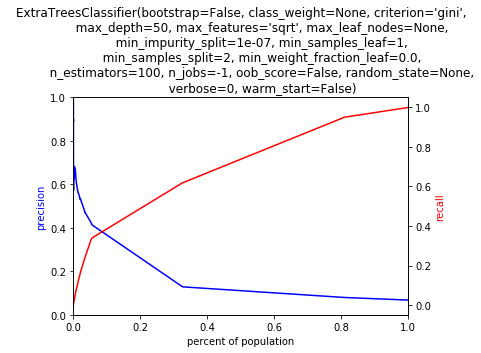

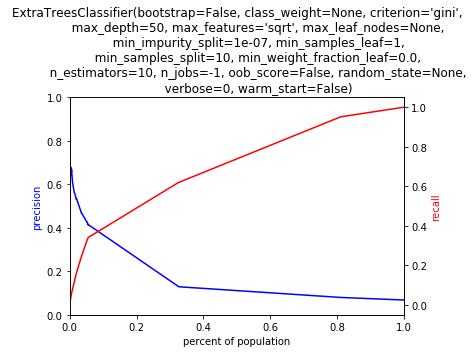

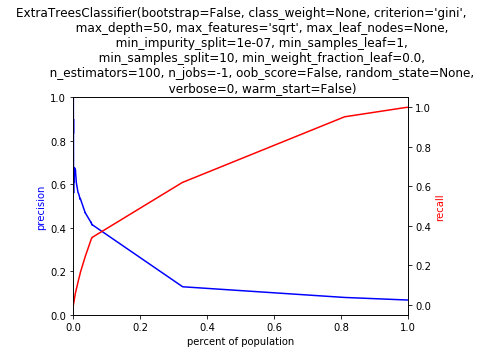

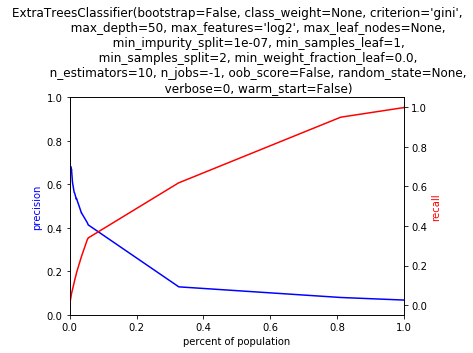

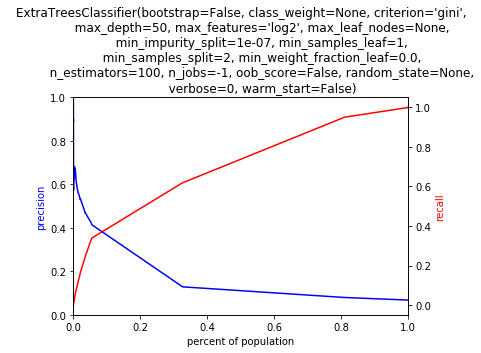

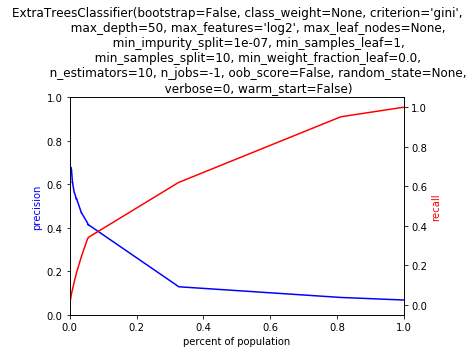

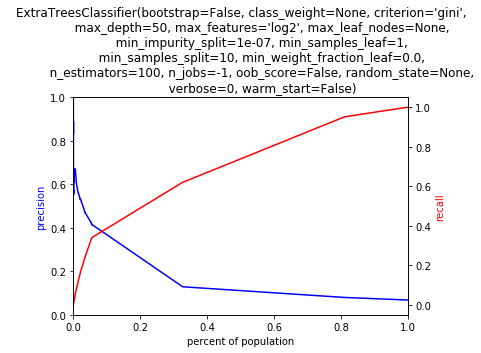

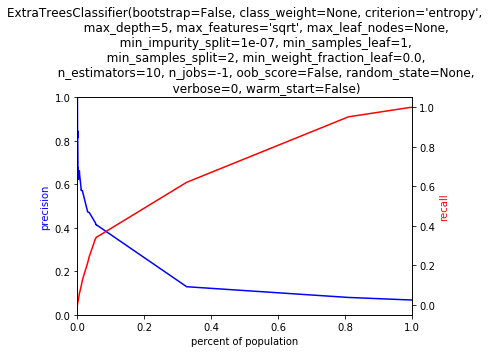

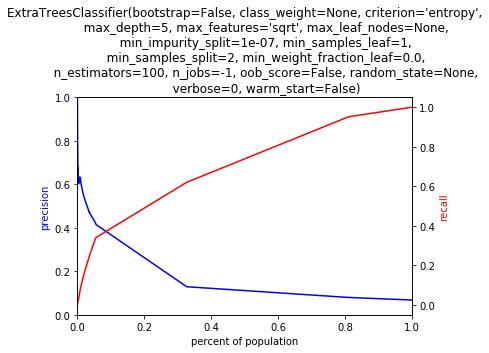

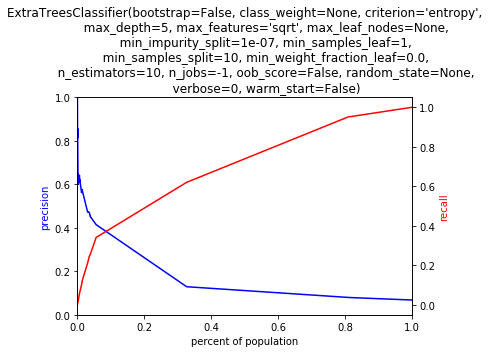

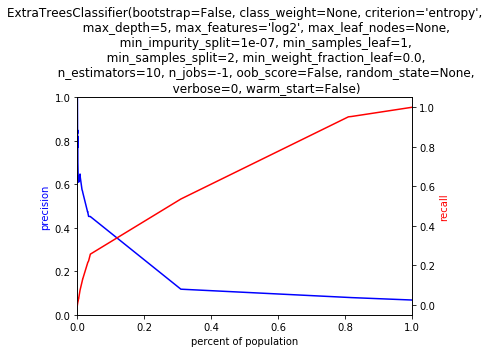

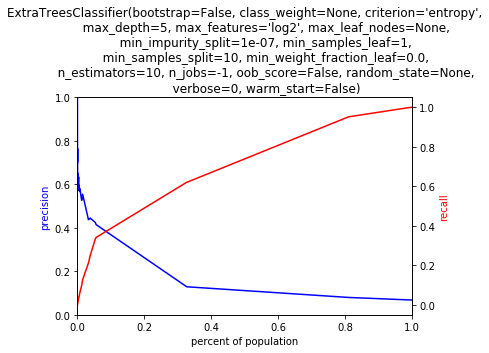

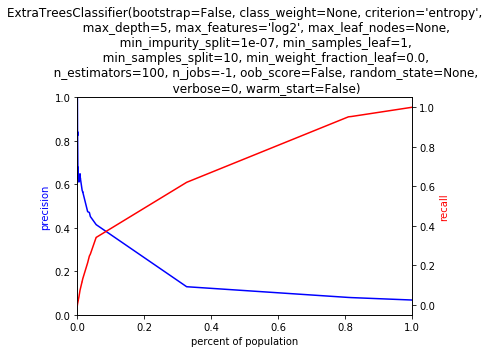

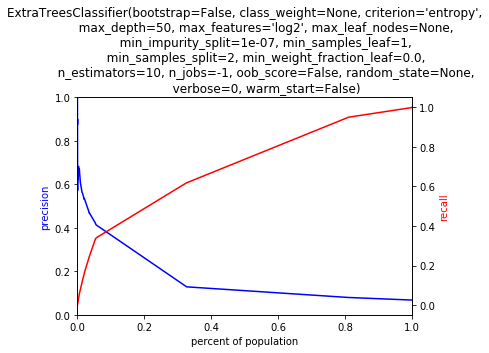

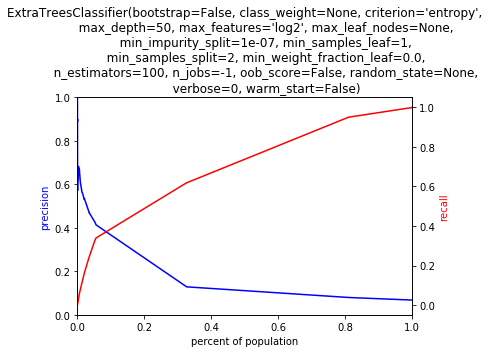

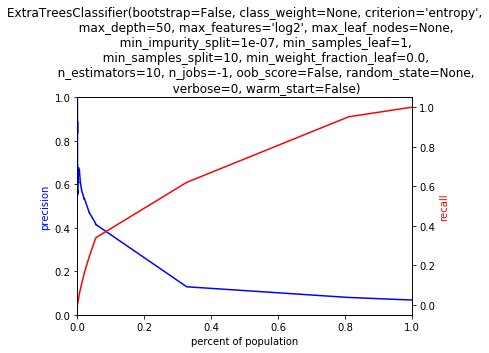

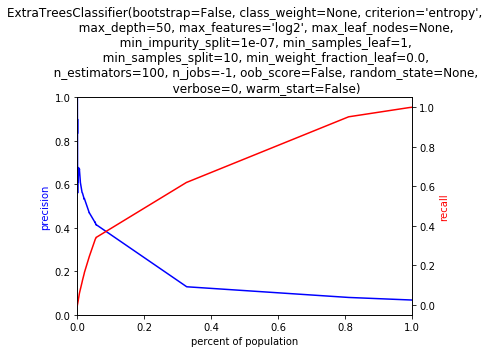

AB


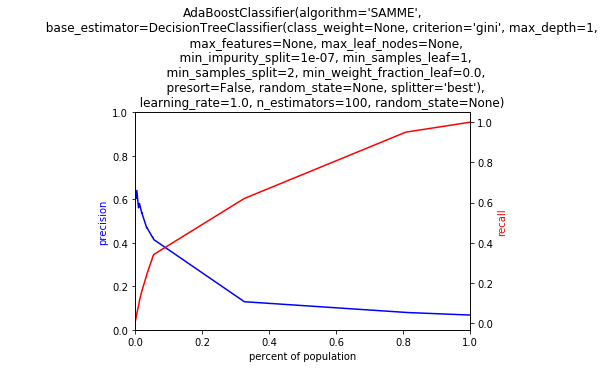

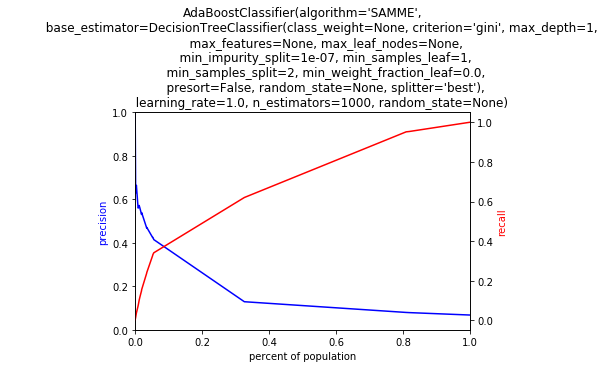

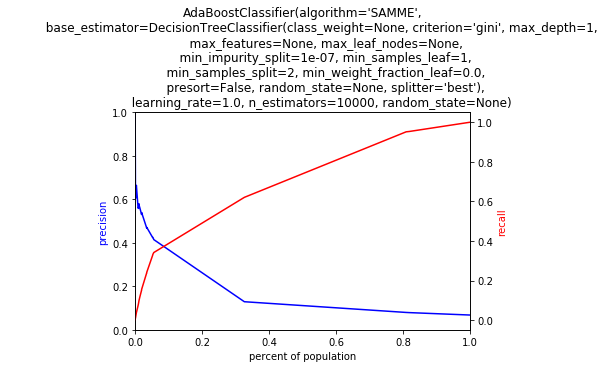

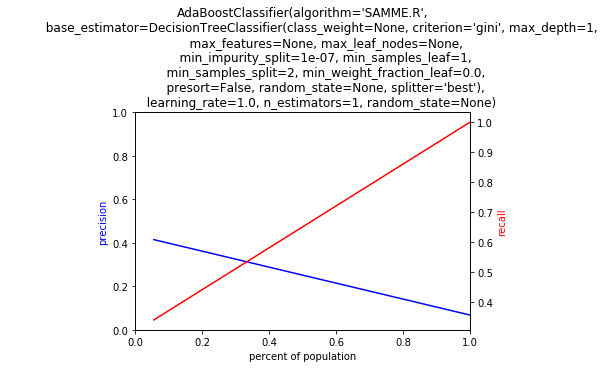

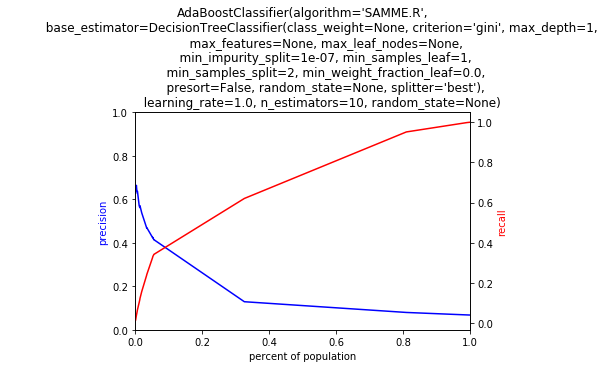

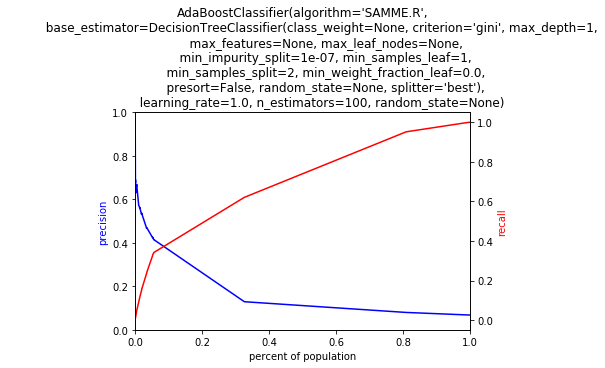

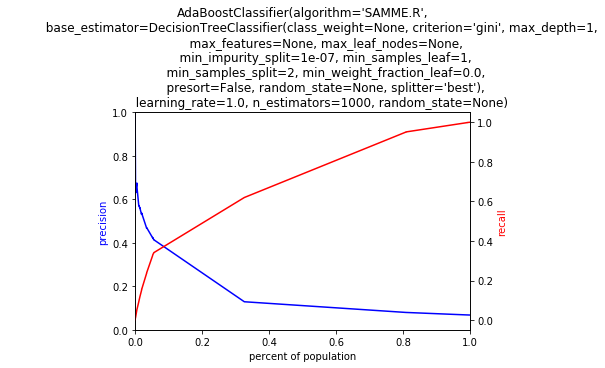

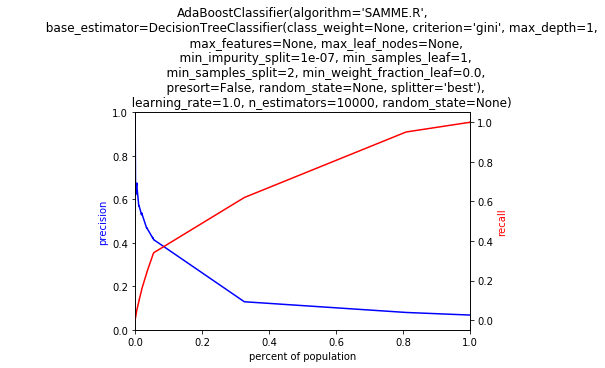

GB


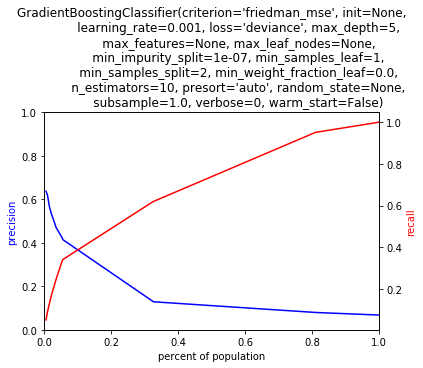

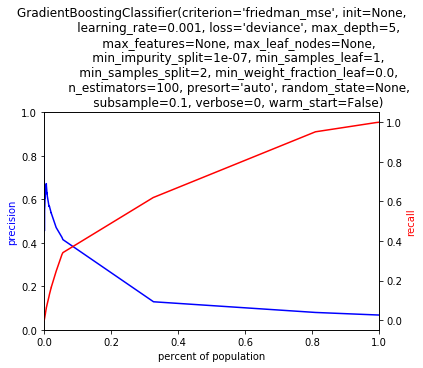

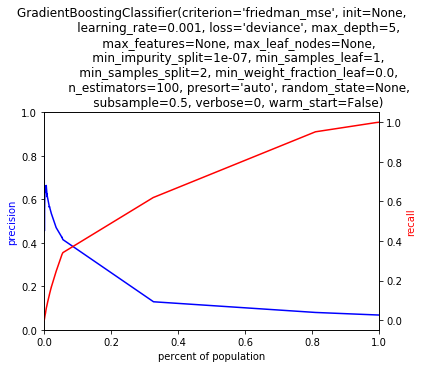

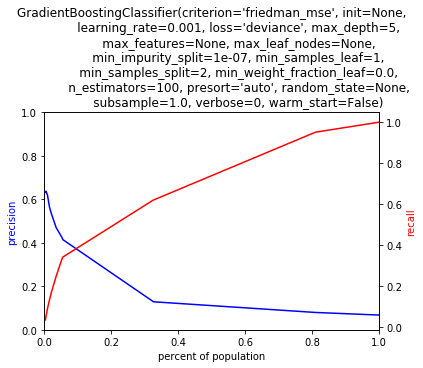

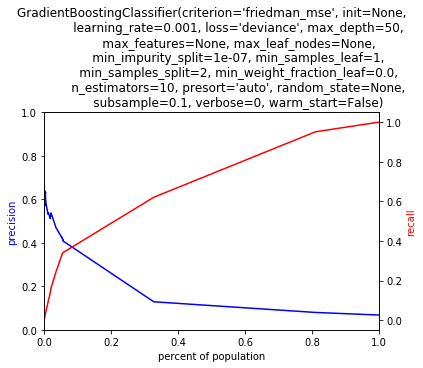

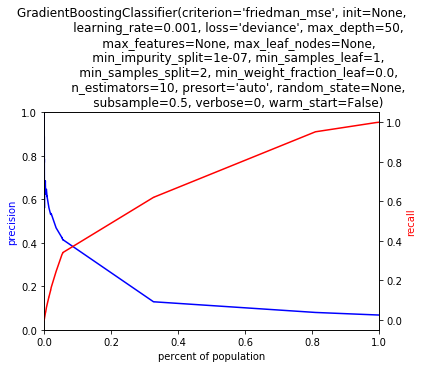

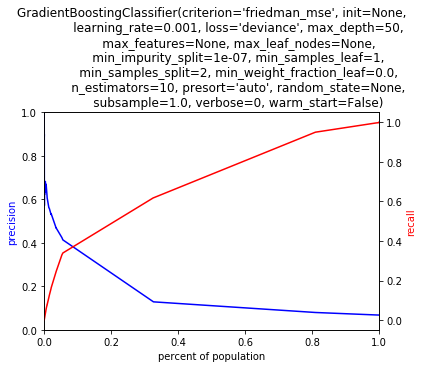

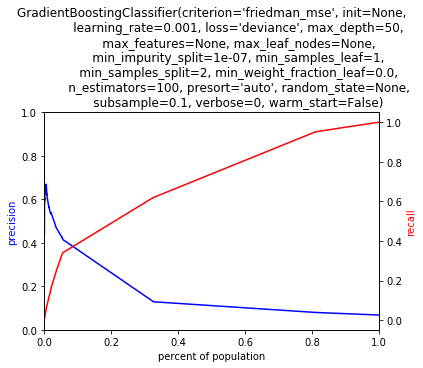

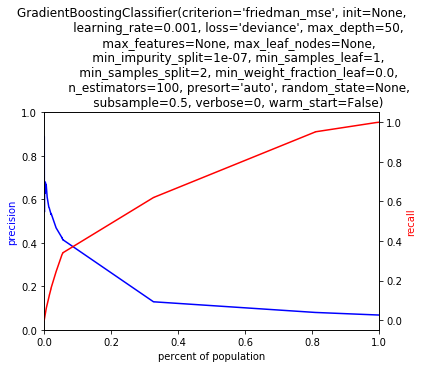

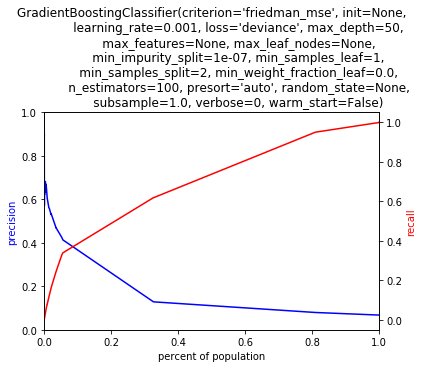

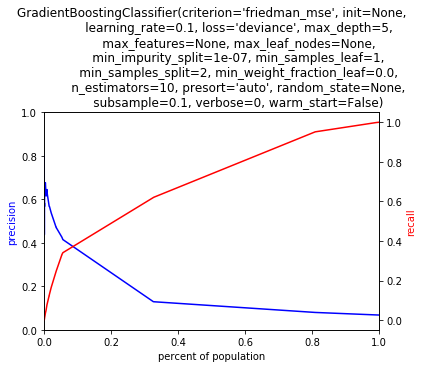

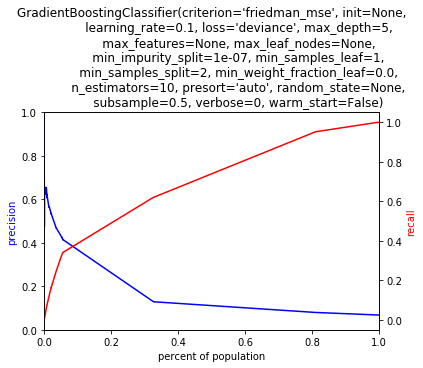

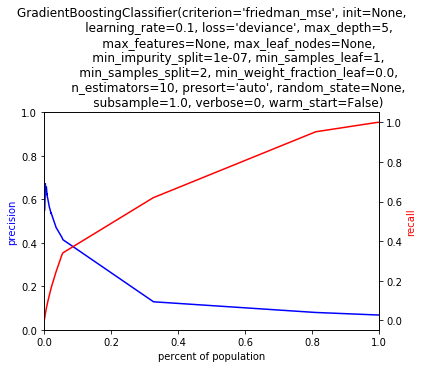

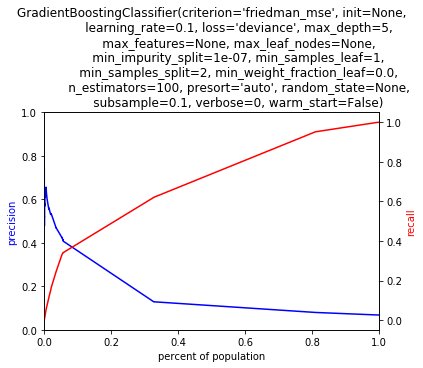

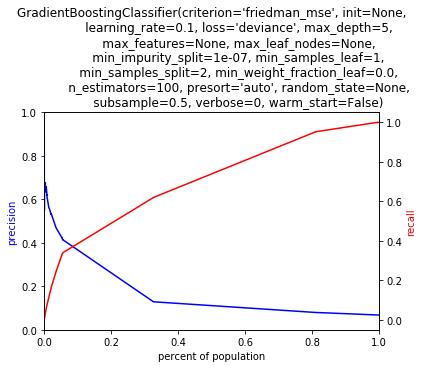

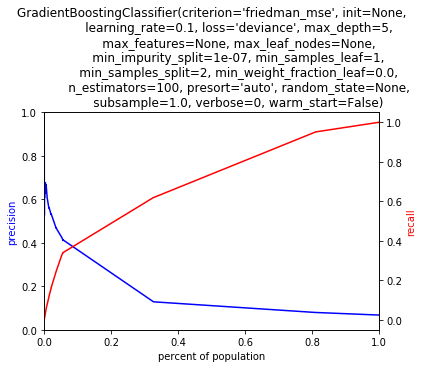

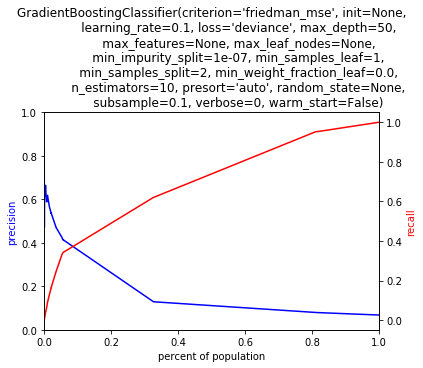

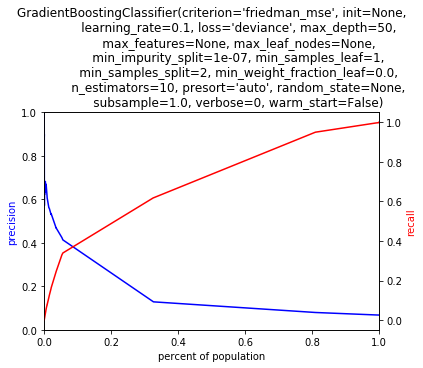

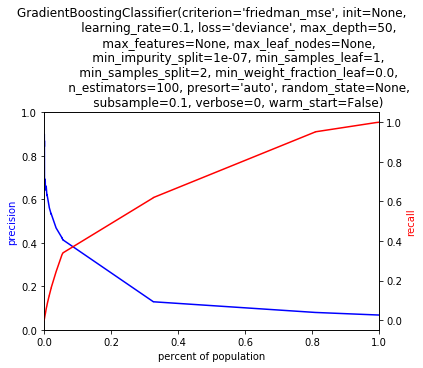

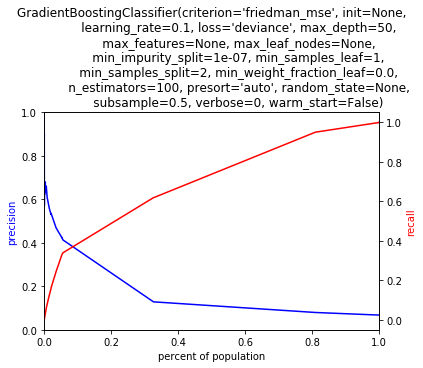

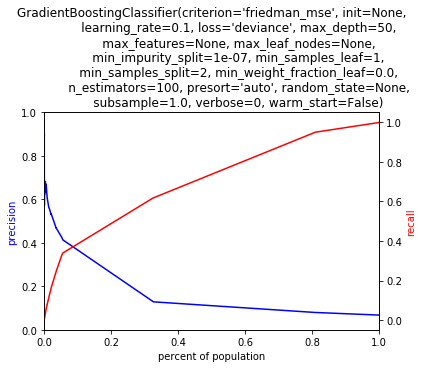

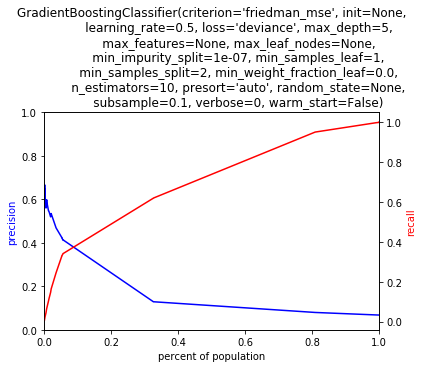

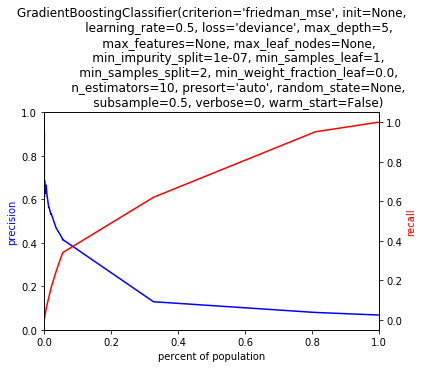

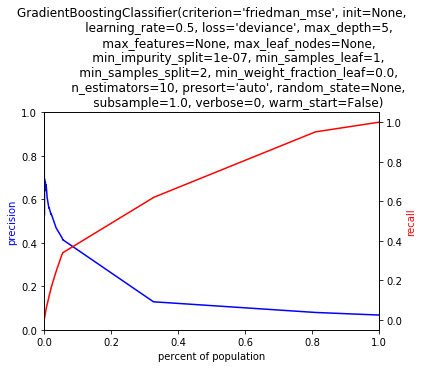

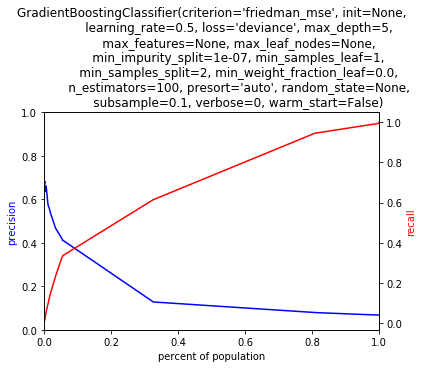

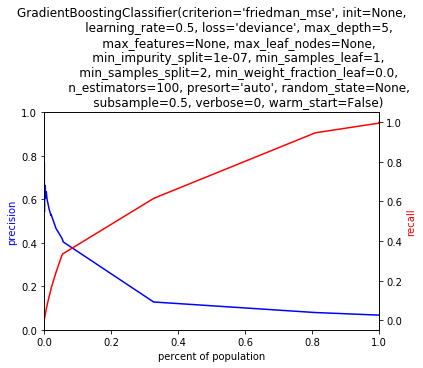

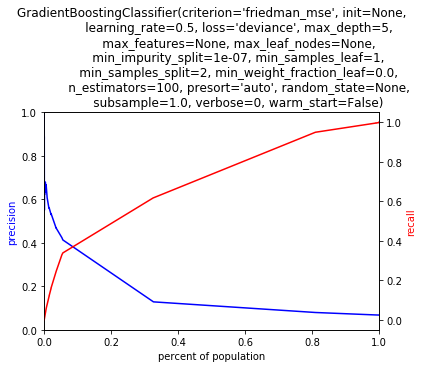

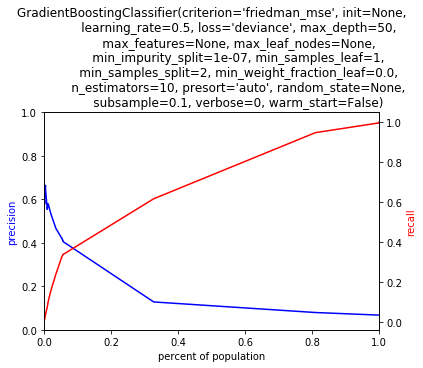

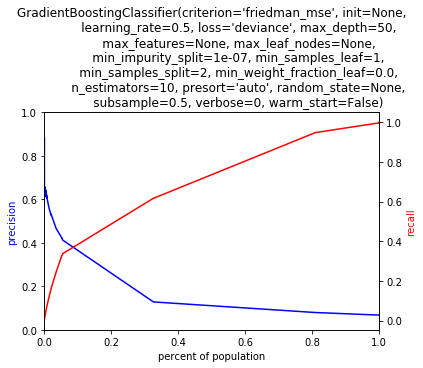

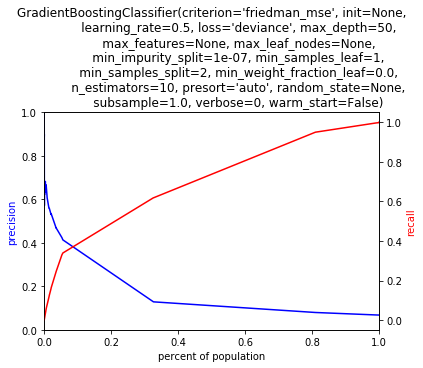

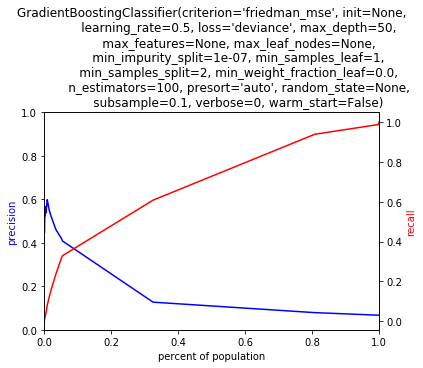

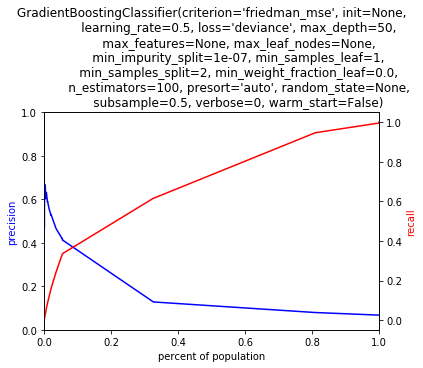

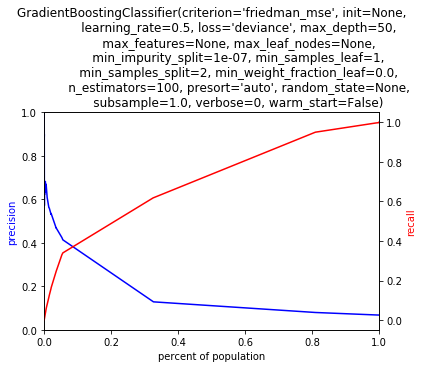

LR


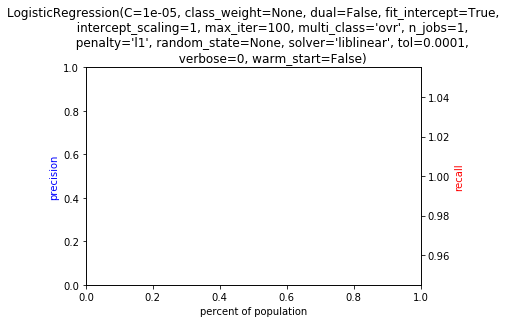

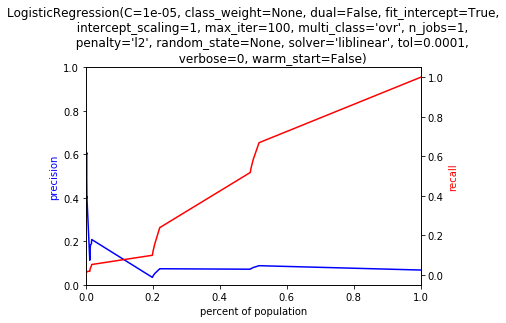

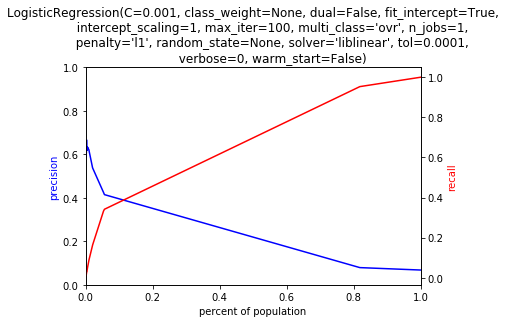

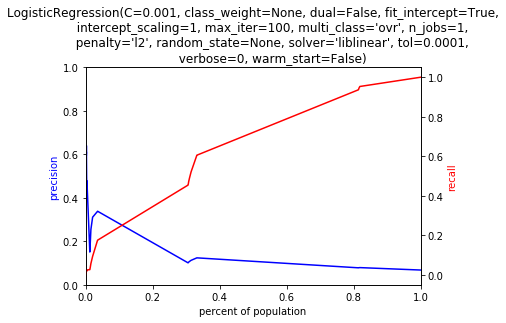

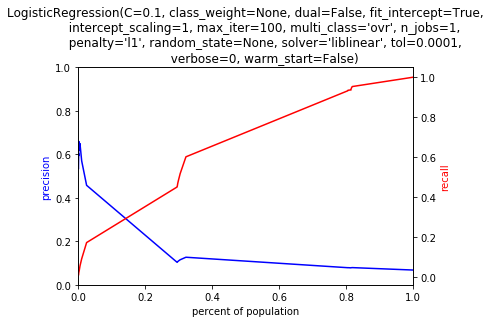

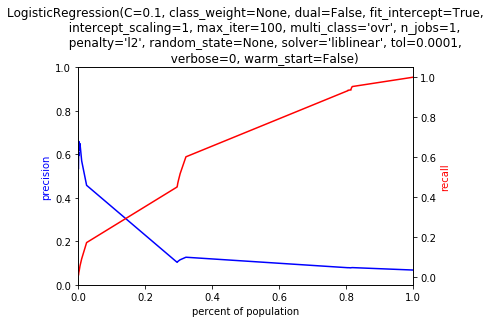

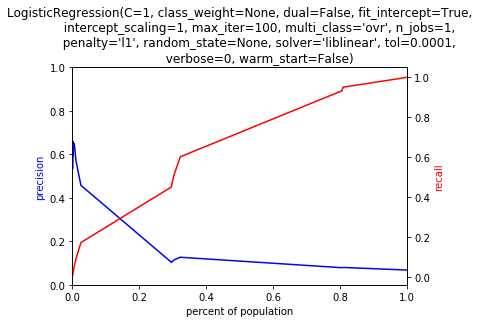

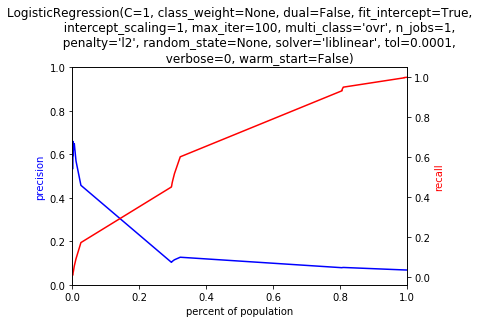

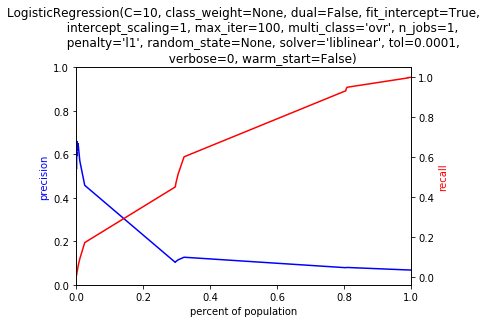

NB


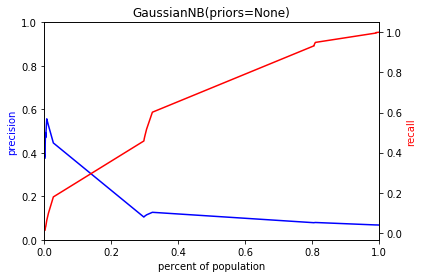

In [41]:
grid_size = 'small'
clfs, grid = ClassifierEvaluation6.define_clfs_params(grid_size)
models_to_run=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']

X = df[features]
y = df.SeriousDlqin2yrs
results_df = ClassifierEvaluation6.clf_loop(models_to_run, clfs, grid, X,y)

In [43]:
results_df.to_csv('results.csv', index=False)